In [3]:
# import packages
from astropy.io import fits
import numpy as np
from PIL import Image
import scipy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

from lmfit import Model, minimize, Parameters, fit_report
from lmfit.models import LinearModel

import os
import warnings
warnings.filterwarnings('ignore')

"""
"""

# path joining version for other paths
notebook_path = os.path.abspath('h3p_map_stack.ipynb' + "/../")
filepath = os.path.join(os.path.dirname(notebook_path), 'spec/')

# count number of fits files in folder
filesize = len([name for name in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, name))])

# set fits index to begin and end
index0 = 22
index1 = 112

# load fits data
order36_data_list = []
order32_data_list = []
order37_data_list = []
order35_data_list = []
order34_data_list = []

for i in range(filesize):
    n = i + index0
    if n>= index0 and n < 10:
        hdu_data_order36 = fits.getdata(filepath + 'order36/new_frame/jun02s000' + '{}_order36.fits'.format(n), ext=0)
        order36_data_list.append(hdu_data_order36)
        hdu_data_order32 = fits.getdata(filepath + 'order32/new_frame/jun02s000' + '{}_order32.fits'.format(n), ext=0)
        order32_data_list.append(hdu_data_order32)
        hdu_data_order37 = fits.getdata(filepath + 'order37/new_frame/jun02s000' + '{}_order37.fits'.format(n), ext=0)
        order37_data_list.append(hdu_data_order37)
        hdu_data_order35 = fits.getdata(filepath + 'order35/new_frame/jun02s000' + '{}_order35.fits'.format(n), ext=0)
        order35_data_list.append(hdu_data_order35)
        hdu_data_order34 = fits.getdata(filepath + 'order34/new_frame/jun02s000' + '{}_order34.fits'.format(n), ext=0)
        order34_data_list.append(hdu_data_order34)
    elif n>= 10 and n < 100:
        hdu_data_order36 = fits.getdata(filepath + 'order36/new_frame/jun02s00' + '{}_order36.fits'.format(n), ext=0)
        order36_data_list.append(hdu_data_order36)
        hdu_data_order32 = fits.getdata(filepath + 'order32/new_frame/jun02s00' + '{}_order32.fits'.format(n), ext=0)
        order32_data_list.append(hdu_data_order32)
        hdu_data_order37 = fits.getdata(filepath + 'order37/new_frame/jun02s00' + '{}_order37.fits'.format(n), ext=0)
        order37_data_list.append(hdu_data_order37)
        hdu_data_order35 = fits.getdata(filepath + 'order35/new_frame/jun02s00' + '{}_order35.fits'.format(n), ext=0)
        order35_data_list.append(hdu_data_order35)
        hdu_data_order34 = fits.getdata(filepath + 'order34/new_frame/jun02s00' + '{}_order34.fits'.format(n), ext=0)
        order34_data_list.append(hdu_data_order34)
    elif n >= 100 and n < index1:
        hdu_data_order36 = fits.getdata(filepath + 'order36/new_frame/jun02s0' + '{}_order36.fits'.format(n), ext=0)
        order36_data_list.append(hdu_data_order36)
        hdu_data_order32 = fits.getdata(filepath + 'order32/new_frame/jun02s0' + '{}_order32.fits'.format(n), ext=0)
        order32_data_list.append(hdu_data_order32)
        hdu_data_order37 = fits.getdata(filepath + 'order37/new_frame/jun02s0' + '{}_order37.fits'.format(n), ext=0)
        order37_data_list.append(hdu_data_order37)
        hdu_data_order35 = fits.getdata(filepath + 'order35/new_frame/jun02s0' + '{}_order35.fits'.format(n), ext=0)
        order35_data_list.append(hdu_data_order35)
        hdu_data_order34 = fits.getdata(filepath + 'order34/new_frame/jun02s0' + '{}_order34.fits'.format(n), ext=0)
        order34_data_list.append(hdu_data_order34)
    elif n >= index1:
        break
order36_data = np.array(order36_data_list)
order32_data = np.array(order32_data_list)
order37_data = np.array(order37_data_list)
order35_data = np.array(order35_data_list)
order34_data = np.array(order34_data_list)

# load waverange
waverange36 = fits.open(filepath + 'order36/' + 'waverange.fits', ignore_missing_end=True)[0].data
waverange32 = fits.open(filepath + 'order32/' + 'waverange.fits', ignore_missing_end=True)[0].data
waverange37 = fits.open(filepath + 'order37/' + 'waverange.fits', ignore_missing_end=True)[0].data
waverange35 = fits.open(filepath + 'order35/' + 'waverange.fits', ignore_missing_end=True)[0].data
waverange34 = fits.open(filepath + 'order34/' + 'waverange.fits', ignore_missing_end=True)[0].data

# load spectral resolution
R36 = 73194.84858495607
R32 = 72803.45487481622
R37 = 72736.04543958924
R35 = 73234.23454151815
R34 = 72543.25347866818
R = np.mean((R36,R32,R37,R35,R34))

# obtain average flat field
avg_flat_order36 = np.mean((order36_data[32-index0], 
                              order36_data[33-index0], 
                              order36_data[34-index0], 
                              order36_data[35-index0], 
                              order36_data[36-index0], 
                              order36_data[37-index0], 
                              order36_data[38-index0], 
                              order36_data[39-index0], 
                              order36_data[40-index0], 
                              order36_data[41-index0],), axis=0)

avg_flat_order32 = np.mean((order32_data[32-index0], 
                              order32_data[33-index0], 
                              order32_data[34-index0], 
                              order32_data[35-index0], 
                              order32_data[36-index0], 
                              order32_data[37-index0], 
                              order32_data[38-index0], 
                              order32_data[39-index0], 
                              order32_data[40-index0], 
                              order32_data[41-index0],), axis=0)

avg_flat_order37 = np.mean((order37_data[32-index0], 
                              order37_data[33-index0], 
                              order37_data[34-index0], 
                              order37_data[35-index0], 
                              order37_data[36-index0], 
                              order37_data[37-index0], 
                              order37_data[38-index0], 
                              order37_data[39-index0], 
                              order37_data[40-index0], 
                              order37_data[41-index0],), axis=0)

avg_flat_order35 = np.mean((order35_data[32-index0], 
                              order35_data[33-index0], 
                              order35_data[34-index0], 
                              order35_data[35-index0], 
                              order35_data[36-index0], 
                              order35_data[37-index0], 
                              order35_data[38-index0], 
                              order35_data[39-index0], 
                              order35_data[40-index0], 
                              order35_data[41-index0],), axis=0)

avg_flat_order34 = np.mean((order34_data[32-index0], 
                              order34_data[33-index0], 
                              order34_data[34-index0], 
                              order34_data[35-index0], 
                              order34_data[36-index0], 
                              order34_data[37-index0], 
                              order34_data[38-index0], 
                              order34_data[39-index0], 
                              order34_data[40-index0], 
                              order34_data[41-index0],), axis=0)

# obtain average flat lamp off
avg_dark_order36 = np.mean((order36_data[22-index0], 
                                 order36_data[23-index0], 
                                 order36_data[24-index0],
                                 order36_data[25-index0], 
                                 order36_data[26-index0], 
                                 order36_data[27-index0], 
                                 order36_data[28-index0], 
                                 order36_data[29-index0], 
                                 order36_data[30-index0], 
                                 order36_data[31-index0],), axis=0)

avg_dark_order32 = np.mean((order32_data[22-index0], 
                                 order32_data[23-index0], 
                                 order32_data[24-index0],
                                 order32_data[25-index0], 
                                 order32_data[26-index0], 
                                 order32_data[27-index0], 
                                 order32_data[28-index0], 
                                 order32_data[29-index0], 
                                 order32_data[30-index0], 
                                 order32_data[31-index0],), axis=0)

avg_dark_order37 = np.mean((order37_data[22-index0], 
                                 order37_data[23-index0], 
                                 order37_data[24-index0],
                                 order37_data[25-index0], 
                                 order37_data[26-index0], 
                                 order37_data[27-index0], 
                                 order37_data[28-index0], 
                                 order37_data[29-index0], 
                                 order37_data[30-index0], 
                                 order37_data[31-index0],), axis=0)

avg_dark_order35 = np.mean((order35_data[22-index0], 
                                 order35_data[23-index0], 
                                 order35_data[24-index0],
                                 order35_data[25-index0], 
                                 order35_data[26-index0], 
                                 order35_data[27-index0], 
                                 order35_data[28-index0], 
                                 order35_data[29-index0], 
                                 order35_data[30-index0], 
                                 order35_data[31-index0],), axis=0)

avg_dark_order34 = np.mean((order34_data[22-index0], 
                                 order34_data[23-index0], 
                                 order34_data[24-index0],
                                 order34_data[25-index0], 
                                 order34_data[26-index0], 
                                 order34_data[27-index0], 
                                 order34_data[28-index0], 
                                 order34_data[29-index0], 
                                 order34_data[30-index0], 
                                 order34_data[31-index0],), axis=0)

# define normalization function
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# define guassian function, credit to pen and pants IDL's Gaussfit in Python
def gaussian_fit(x, a0, a1, a2, a3, a4, a5): 
    """
    x = data array
    a0 = height of guassian
    a1 = pixel position of Gaussian peak
    a2 = width of Gaussian
    a3 = constant term
    a4 = linear term
    a5 = quadratic term
    
    note: fwhm = a2 * np.sqrt(2 * np.log(2)) * 2
    """
    z = (x - a1) / a2
    y = a0 * np.exp(-z**2 / a2) + a3 + a4 * x + a5 * x**2
    return y

# convert observation time (UTC) to seconds 
def fits_header_utc_to_second(fn):
    # fn = frame_number
    if fn >= 0 and fn < 10:
        hdu_header = fits.open(filepath + 'jun02s000' + '{}.fits'.format(fn), ignore_missing_end=True)[0].header
    elif fn >= 10 and fn < 100:
        hdu_header = fits.open(filepath + 'jun02s00' + '{}.fits'.format(fn), ignore_missing_end=True)[0].header
    elif fn >= 100 and fn < index1:
        hdu_header = fits.open(filepath + 'jun02s0' + '{}.fits'.format(fn), ignore_missing_end=True)[0].header
    elif fn >= index1:
        pass
    
    h = float(hdu_header['UTC'].split(':')[0])
    m = float(hdu_header['UTC'].split(':')[1])
    s = float(hdu_header['UTC'].split(':')[2])
    
    seconds = h * 3600 + m * 60 + s
    return seconds

# scale the sky frame using the equation on page 9 of Stallard_et_al_2019
def scale_sky_frame(data, fn_spec):
    """
    confirmed sky frames: 51, 59, 60, 72, 78, 79, 91, 103
    """
#     sky_frame = [51,59,60,72,78,91,103]
    if fn_spec >=0 and fn_spec < 51:
        fn_sky1 = 51
        fn_sky2 = 59
    elif fn_spec > 51 and fn_spec < 60:
        fn_sky1 = 51 # frame number of sky1
        fn_sky2 = 59 # frame number of sky2
    elif fn_spec > 60 and fn_spec < 72:
        fn_sky1 = 60
        fn_sky2 = 72
    elif fn_spec > 72 and fn_spec < 78:
        fn_sky1 = 72
        fn_sky2 = 78
    elif fn_spec > 78 and fn_spec < 91:
        fn_sky1 = 79
        fn_sky2 = 91
    elif fn_spec > 91 and fn_spec < 103:
        fn_sky1 = 91
        fn_sky2 = 103
    elif fn_spec > 103:
        fn_sky1 = 91
        fn_sky2 = 103

    sky1 = data[fn_sky1-index0]
    sky2 = data[fn_sky2-index0]

    t1 = fits_header_utc_to_second(fn_sky1) 
    t2 = fits_header_utc_to_second(fn_sky2)
    td = fits_header_utc_to_second(fn_spec)

    sky_final = sky1 * ((t2 - td) / (t2 - t1)) + sky2 * ((td - t1) / (t2 - t1))
    return sky_final

# reduce fits for different orders and collect
# order36
spec36_reducelist = []

for i in range(60, 104):
    sky_frame = (51, 59, 60, 72, 78, 79, 91, 103)
    
    if i in sky_frame:
        continue
    elif i not in sky_frame:
        skyframe36 = scale_sky_frame(order36_data, i)
    
        reduce_spec36 = (order36_data[i-index0] - skyframe36) / (avg_flat_order36 - avg_dark_order36)
        reduce_spec36[reduce_spec36<0] = 0
    
        spec36_reducelist.append(reduce_spec36)
spec36_reduced = np.array(spec36_reducelist)
spec36_stacked = np.sum((spec36_reduced), axis=0)

# order32
spec32_reducelist = []

for i in range(60, 104):
    sky_frame = (51, 59, 60, 72, 78, 79, 91, 103)
    
    if i in sky_frame:
        continue
    elif i not in sky_frame:
        skyframe32 = scale_sky_frame(order32_data, i)
    
        reduce_spec32 = (order32_data[i-index0] - skyframe32) / (avg_flat_order32 - avg_dark_order32)
        reduce_spec32[reduce_spec32<0] = 0
        reduce_spec32 = np.vstack((reduce_spec32, np.zeros((9, 1024))))
    
        spec32_reducelist.append(reduce_spec32)
spec32_reduced = np.array(spec32_reducelist)
spec32_stacked = np.sum((spec32_reduced), axis=0)

# order37
spec37_reducelist = []

for i in range(60, 104):
    sky_frame = (51, 59, 60, 72, 78, 79, 91, 103)
    
    if i in sky_frame:
        continue
    elif i not in sky_frame:
        skyframe37 = scale_sky_frame(order37_data, i)
    
        reduce_spec37 = (order37_data[i-index0] - skyframe37) / (avg_flat_order37 - avg_dark_order37)
        reduce_spec37[reduce_spec37<0] = 0
        reduce_spec37 = np.vstack((reduce_spec37, np.zeros((7, 1024))))
    
        spec37_reducelist.append(reduce_spec37)
spec37_reduced = np.array(spec37_reducelist)
spec37_stacked = np.sum((spec37_reduced), axis=0)

# order35
spec35_reducelist = []

for i in range(60, 104):
    sky_frame = (51, 59, 60, 72, 78, 79, 91, 103)
    
    if i in sky_frame:
        continue
    elif i not in sky_frame:
        skyframe35 = scale_sky_frame(order35_data, i)
    
        reduce_spec35 = (order35_data[i-index0] - skyframe35) / (avg_flat_order35 - avg_dark_order35)
        reduce_spec35[reduce_spec35<0] = 0
        reduce_spec35 = np.delete(reduce_spec35, np.s_[:8], 0)
    
        spec35_reducelist.append(reduce_spec35)
spec35_reduced = np.array(spec35_reducelist)
spec35_stacked = np.sum((spec35_reduced), axis=0)

# order34
spec34_reducelist = []

for i in range(60, 104):
    sky_frame = (51, 59, 60, 72, 78, 79, 91, 103)
    
    if i in sky_frame:
        continue
    elif i not in sky_frame:
        skyframe34 = scale_sky_frame(order34_data, i)
    
        reduce_spec34 = (order34_data[i-index0] - skyframe34) / (avg_flat_order34 - avg_dark_order34)
        reduce_spec34[reduce_spec34<0] = 0
        reduce_spec34 = np.vstack((reduce_spec34, np.zeros((17, 1024))))
    
        spec34_reducelist.append(reduce_spec34)
spec34_reduced = np.array(spec34_reducelist)
spec34_stacked = np.sum((spec34_reduced), axis=0)

# load and reduce star spectra
modeA36 = order36_data[43-index0] + order36_data[46-index0] +\
        order36_data[47-index0] + order36_data[50-index0]
modeB36 = order36_data[44-index0] + order36_data[45-index0] +\
        order36_data[48-index0] + order36_data[49-index0]
modeA32 = order32_data[43-index0] + order32_data[46-index0] +\
        order32_data[47-index0] + order32_data[50-index0]
modeB32 = order32_data[44-index0] + order32_data[45-index0] +\
        order32_data[48-index0] + order32_data[49-index0]
modeA37 = order37_data[43-index0] + order37_data[46-index0] +\
        order37_data[47-index0] + order37_data[50-index0]
modeB37 = order37_data[44-index0] + order37_data[45-index0] +\
        order37_data[48-index0] + order37_data[49-index0]
modeA35 = order35_data[43-index0] + order35_data[46-index0] +\
        order35_data[47-index0] + order35_data[50-index0]
modeB35 = order35_data[44-index0] + order35_data[45-index0] +\
        order35_data[48-index0] + order35_data[49-index0]
modeA34 = order34_data[43-index0] + order34_data[46-index0] +\
        order34_data[47-index0] + order34_data[50-index0]
modeB34 = order34_data[44-index0] + order34_data[45-index0] +\
        order34_data[48-index0] + order34_data[49-index0]

exp_star = 20

modeAB36 = ((modeA36 - modeB36)/4)/(avg_flat_order36 - avg_dark_order36)/exp_star
modeAB32 = ((modeA32 - modeB32)/4)/(avg_flat_order32 - avg_dark_order32)/exp_star
modeAB32 = np.vstack((modeAB32, np.zeros((9, 1024))))
modeAB37 = ((modeA37 - modeB37)/4)/(avg_flat_order37 - avg_dark_order37)/exp_star
modeAB37 = np.vstack((modeAB37, np.zeros((7, 1024))))
modeAB35 = ((modeA35 - modeB35)/4)/(avg_flat_order35 - avg_dark_order35)/exp_star
modeAB35 = np.delete(modeAB35, np.s_[:8], 0)
modeAB34 = ((modeA34 - modeB34)/4)/(avg_flat_order34 - avg_dark_order34)/exp_star
modeAB34 = np.vstack((modeAB34, np.zeros((17, 1024))))

# compute star spectra
flux36_model = Model(gaussian_fit)
flux32_model = Model(gaussian_fit)
flux37_model = Model(gaussian_fit)
flux35_model = Model(gaussian_fit)
flux34_model = Model(gaussian_fit)

flux36_params = flux36_model.make_params()
flux36_params.add('a0', value=0.005, min=0, max=0.01)
flux36_params.add('a1', value=71, min=68, max=74)
flux36_params.add('a2', value=2, min=0.5, max=5)
flux36_params.add('a3', value=0)
flux36_params.add('a4', value=0)
flux36_params.add('a5', value=0)

flux32_params = flux32_model.make_params()
flux32_params.add('a0', value=0.004, min=0, max=0.01)
flux32_params.add('a1', value=68, min=65, max=71)
flux32_params.add('a2', value=2, min=0.5, max=5)
flux32_params.add('a3', value=0)
flux32_params.add('a4', value=0)
flux32_params.add('a5', value=0)

flux37_params = flux37_model.make_params()
flux37_params.add('a0', value=0.004, min=0, max=0.01)
flux37_params.add('a1', value=71, min=68, max=74)
flux37_params.add('a2', value=2, min=0.5, max=5)
flux37_params.add('a3', value=0)
flux37_params.add('a4', value=0)
flux37_params.add('a5', value=0)

flux35_params = flux35_model.make_params()
flux35_params.add('a0', value=0.004, min=0, max=0.01)
flux35_params.add('a1', value=73, min=70, max=76)
flux35_params.add('a2', value=2, min=0.5, max=5)
flux35_params.add('a3', value=0)
flux35_params.add('a4', value=0)
flux35_params.add('a5', value=0)

flux34_params = flux34_model.make_params()
flux34_params.add('a0', value=0.004, min=0, max=0.01)
flux34_params.add('a1', value=65, min=62, max=68)
flux34_params.add('a2', value=2, min=0.5, max=5)
flux34_params.add('a3', value=0)
flux34_params.add('a4', value=0)
flux34_params.add('a5', value=0)

lower = 0
upper = 1024

spat_axis = np.linspace(0,263,264)

star36_a0 = np.zeros(np.size(modeAB36,1))
star36_a2 = np.zeros(np.size(modeAB36,1))
star32_a0 = np.zeros(np.size(modeAB32,1))
star32_a2 = np.zeros(np.size(modeAB32,1))
star37_a0 = np.zeros(np.size(modeAB37,1))
star37_a2 = np.zeros(np.size(modeAB37,1))
star35_a0 = np.zeros(np.size(modeAB35,1))
star35_a2 = np.zeros(np.size(modeAB35,1))
star34_a0 = np.zeros(np.size(modeAB34,1))
star34_a2 = np.zeros(np.size(modeAB34,1))

for i in range(lower, upper):
    try:
        flux36_fit_result = flux36_model.fit(modeAB36.T[i], flux36_params, x=spat_axis)
    except ValueError:
        print('ValueError occured at i=' + str(i) + ' order36')
    try:
        flux32_fit_result = flux32_model.fit(modeAB32.T[i], flux32_params, x=spat_axis)
    except ValueError:
        print('ValueError occured at i=' + str(i) + ' order32')
    try:
        flux37_fit_result = flux37_model.fit(modeAB37.T[i], flux37_params, x=spat_axis)
    except ValueError:
        print('ValueError occured at i=' + str(i) + ' order37')
    try:
        flux35_fit_result = flux35_model.fit(modeAB35.T[i], flux35_params, x=spat_axis)
    except ValueError:
        print('ValueError occured at i=' + str(i) + ' order35')
    try:
        flux34_fit_result = flux34_model.fit(modeAB34.T[i], flux34_params, x=spat_axis)
    except ValueError:
        print('ValueError occured at i=' + str(i) + ' order34')
#     plt.figure()
#     plt.title('i='+str(i))
#     plt.plot(spat_axis, modeAB36.T[i])
#     plt.plot(spat_axis, flux36_fit_result.best_fit, 'r-', label='best fit')    
    star36_a0[i] = flux36_fit_result.params['a0'].value
    star36_a2[i] = flux36_fit_result.params['a2'].value
    star32_a0[i] = flux32_fit_result.params['a0'].value
    star32_a2[i] = flux32_fit_result.params['a2'].value
    star37_a0[i] = flux37_fit_result.params['a0'].value
    star37_a2[i] = flux37_fit_result.params['a2'].value
    star35_a0[i] = flux35_fit_result.params['a0'].value
    star35_a2[i] = flux35_fit_result.params['a2'].value
    star34_a0[i] = flux34_fit_result.params['a0'].value
    star34_a2[i] = flux34_fit_result.params['a2'].value
    
# compute calibration spectra
lambda_aw = 2.2 # mu m
hc_kb = 14388 # mu m K
T = 10000 # K

F_alpha_lyrae = 4.07e-10
m_lambda = 6.787 # Kmag HD 109840
F_a0 = F_alpha_lyrae * 10**(-0.4*m_lambda)

Fbb36 = F_a0 * ((lambda_aw/waverange36)**5) * ((np.exp(hc_kb/(lambda_aw*T)) - 1)/(np.exp(hc_kb/(waverange36*T)) - 1))
Fbb32 = F_a0 * ((lambda_aw/waverange32)**5) * ((np.exp(hc_kb/(lambda_aw*T)) - 1)/(np.exp(hc_kb/(waverange32*T)) - 1))
Fbb37 = F_a0 * ((lambda_aw/waverange37)**5) * ((np.exp(hc_kb/(lambda_aw*T)) - 1)/(np.exp(hc_kb/(waverange37*T)) - 1))
Fbb35 = F_a0 * ((lambda_aw/waverange35)**5) * ((np.exp(hc_kb/(lambda_aw*T)) - 1)/(np.exp(hc_kb/(waverange35*T)) - 1))
Fbb34 = F_a0 * ((lambda_aw/waverange34)**5) * ((np.exp(hc_kb/(lambda_aw*T)) - 1)/(np.exp(hc_kb/(waverange34*T)) - 1))

star36_fwhm = star36_a2*(np.sqrt(2*np.log(2))*2)
Fobs36 = star36_a0 * star36_fwhm
star32_fwhm = star32_a2*(np.sqrt(2*np.log(2))*2)
Fobs32 = star32_a0 * star32_fwhm
star37_fwhm = star37_a2*(np.sqrt(2*np.log(2))*2)
Fobs37 = star37_a0 * star37_fwhm
star35_fwhm = star35_a2*(np.sqrt(2*np.log(2))*2)
Fobs35 = star35_a0 * star35_fwhm
star34_fwhm = star34_a2*(np.sqrt(2*np.log(2))*2)
Fobs34 = star34_a0 * star34_fwhm

Fc36 = Fbb36/Fobs36
Fc32 = Fbb32/Fobs32
Fc37 = Fbb37/Fobs37
Fc35 = Fbb35/Fobs35
Fc34 = Fbb34/Fobs34

width = np.size(spec36_reduced, axis=1)
length = np.size(spec36_reduced, axis=2)

slit_area36 = 0.1*width*2.908e-5*length
slit_area32 = 0.1*width*3.304e-5*length
slit_area37 = 0.1*width*2.859e-5*length
slit_area35 = 0.1*width*2.999e-5*length
slit_area34 = 0.1*width*3.100e-5*length
exp_spec = 10*6

# flux calibration - converts the jovian spectra from counts per second to flux
fjc36_list = []
fjc32_list = []
fjc37_list = []
fjc35_list = []
fjc34_list = []

for i in range(np.size(spec36_reduced, axis=0)):
    fjc36_list.append(spec36_reduced[i] / exp_spec * Fc36 * 4.2535e10 / slit_area36)
    fjc32_list.append(spec32_reduced[i] / exp_spec * Fc32 * 4.2535e10 / slit_area32)
    fjc37_list.append(spec37_reduced[i] / exp_spec * Fc37 * 4.2535e10 / slit_area37)
    fjc35_list.append(spec37_reduced[i] / exp_spec * Fc35 * 4.2535e10 / slit_area35)
    fjc34_list.append(spec34_reduced[i] / exp_spec * Fc35 * 4.2535e10 / slit_area34)

fjc36 = np.array(fjc36_list)
fjc32 = np.array(fjc32_list)
fjc37 = np.array(fjc37_list)
fjc35 = np.array(fjc35_list)
fjc34 = np.array(fjc34_list)

# smooth along temporal axis - rolling stack of frame numbers
# stack_list36 = []
# stack_list32 = []
# stack_list37 = []
# stack_list35 = []
# stack_list34 = []

# for i in range(np.size(fjc36, axis=0)-1):
#     if i != 15:
#         stack_list36.append(np.sum((fjc36[i], fjc36[i+1]), axis=0))
#         stack_list32.append(np.sum((fjc32[i], fjc32[i+1]), axis=0))
#         stack_list37.append(np.sum((fjc37[i], fjc37[i+1]), axis=0))
#         stack_list35.append(np.sum((fjc35[i], fjc35[i+1]), axis=0))
#         stack_list34.append(np.sum((fjc34[i], fjc34[i+1]), axis=0))
    
# spec36_coadd = np.array(stack_list36)
# spec32_coadd = np.array(stack_list32)
# spec37_coadd = np.array(stack_list37)
# spec35_coadd = np.array(stack_list35)
# spec34_coadd = np.array(stack_list34)

# smooth along wavelength axis - stacking multiple emission lines to enhance s/n ratio
st_list = []
# smooth = []
for i in range(np.size(fjc36, axis=0)):
    s1a = np.delete(fjc36[i], np.s_[439:], 1)
    s1b = np.delete(s1a, np.s_[:399], 1)
    s1b = scipy.ndimage.shift(s1b, -0.454378, order=3, mode='nearest')

    s2a = np.delete(fjc32[i], np.s_[221:], 1)
    s2b = np.delete(s2a, np.s_[:181], 1)
    s2b = scipy.ndimage.shift(s2b, 5.530339, order=3, mode='nearest')

    s3a = np.delete(fjc36[i], np.s_[539:], 1)
    s3b = np.delete(s3a, np.s_[:499], 1)
    s3b = scipy.ndimage.shift(s3b, -0.076430, order=3, mode='nearest')

    s4a = np.delete(fjc36[i], np.s_[669:], 1)
    s4b = np.delete(s4a, np.s_[:629], 1)
    s4b = scipy.ndimage.shift(s4b, 0.234528, order=3, mode='nearest')

    s5a = np.delete(fjc36[i], np.s_[873:], 1)
    s5b = np.delete(s5a, np.s_[:833], 1)
    s5b = scipy.ndimage.shift(s5b, 0.378369, order=3, mode='nearest')

    s6a = np.delete(fjc36[i], np.s_[140:], 1)
    s6b = np.delete(s6a, np.s_[:100], 1)
    s6b = scipy.ndimage.shift(s6b, 15.041735, order=3, mode='nearest')

    s7a = np.delete(fjc37[i], np.s_[443:], 1)
    s7b = np.delete(s7a, np.s_[:403], 1)
    s7b = scipy.ndimage.shift(s7b, -3.293717, order=3, mode='nearest')

    s8a = np.delete(fjc35[i], np.s_[532:], 1)
    s8b = np.delete(s8a, np.s_[:492], 1)
    s8b = scipy.ndimage.shift(s8b, 0.235798, order=3, mode='nearest')

    s9a = np.delete(fjc36[i], np.s_[86:], 1)
    s9b = np.delete(s9a, np.s_[:46], 1)
    s9b = scipy.ndimage.shift(s9b, 0.155569, order=3, mode='nearest')

    s10a = np.delete(fjc36[i], np.s_[323:], 1)
    s10b = np.delete(s10a, np.s_[:283], 1)
    s10b = scipy.ndimage.shift(s10b, 10.464537, order=3, mode='nearest')

    s11a = np.delete(fjc35[i], np.s_[185:], 1)
    s11b = np.delete(s11a, np.s_[:145], 1)
    s11b = scipy.ndimage.shift(s11b, -0.288932, order=3, mode='nearest')

    s12a = np.delete(fjc35[i], np.s_[811:], 1)
    s12b = np.delete(s12a, np.s_[:771], 1)
    s12b = scipy.ndimage.shift(s12b, -0.489157, order=3, mode='nearest')

    s13a = np.delete(fjc36[i], np.s_[915:], 1)
    s13b = np.delete(s13a, np.s_[:875], 1)
    s13b = scipy.ndimage.shift(s13b, -0.523155, order=3, mode='nearest')

    s14a = np.delete(fjc35[i], np.s_[727:], 1)
    s14b = np.delete(s14a, np.s_[:687], 1)
    s14b = scipy.ndimage.shift(s14b, -6.983206, order=3, mode='nearest')

    s15a = np.delete(fjc37[i], np.s_[510:], 1)
    s15b = np.delete(s15a, np.s_[:470], 1)
    s15b = scipy.ndimage.shift(s15b, -0.570506, order=3, mode='nearest')

    s16a = np.delete(fjc37[i], np.s_[928:], 1)
    s16b = np.delete(s16a, np.s_[:888], 1)
    s16b = scipy.ndimage.shift(s16b, -5.808544, order=3, mode='nearest')

    s17a = np.delete(fjc34[i], np.s_[411:], 1)
    s17b = np.delete(s17a, np.s_[:371], 1)
    s17b = scipy.ndimage.shift(s17b, -0.883871, order=3, mode='nearest')
    
    stt = s1b+s2b+s3b+s4b+s5b+s6b+s7b+s8b+s9b+s10b+s11b+s12b+s13b+s14b+s15b+s16b+s17b
    
    # smooth along spatial axis - rolling stack of 5 pixels 
#     smoo = []
#     for j in range(2, len(stt)-2):
#         addup = np.mean((stt[j-2],stt[j-1],stt[j],stt[j+1],stt[j+2]), axis=0)
#         smoo.append(addup)
#     smooth = np.array(smoo)
    
    st_list.append(stt)

st = np.array(st_list)

(0.0, 1010.0)

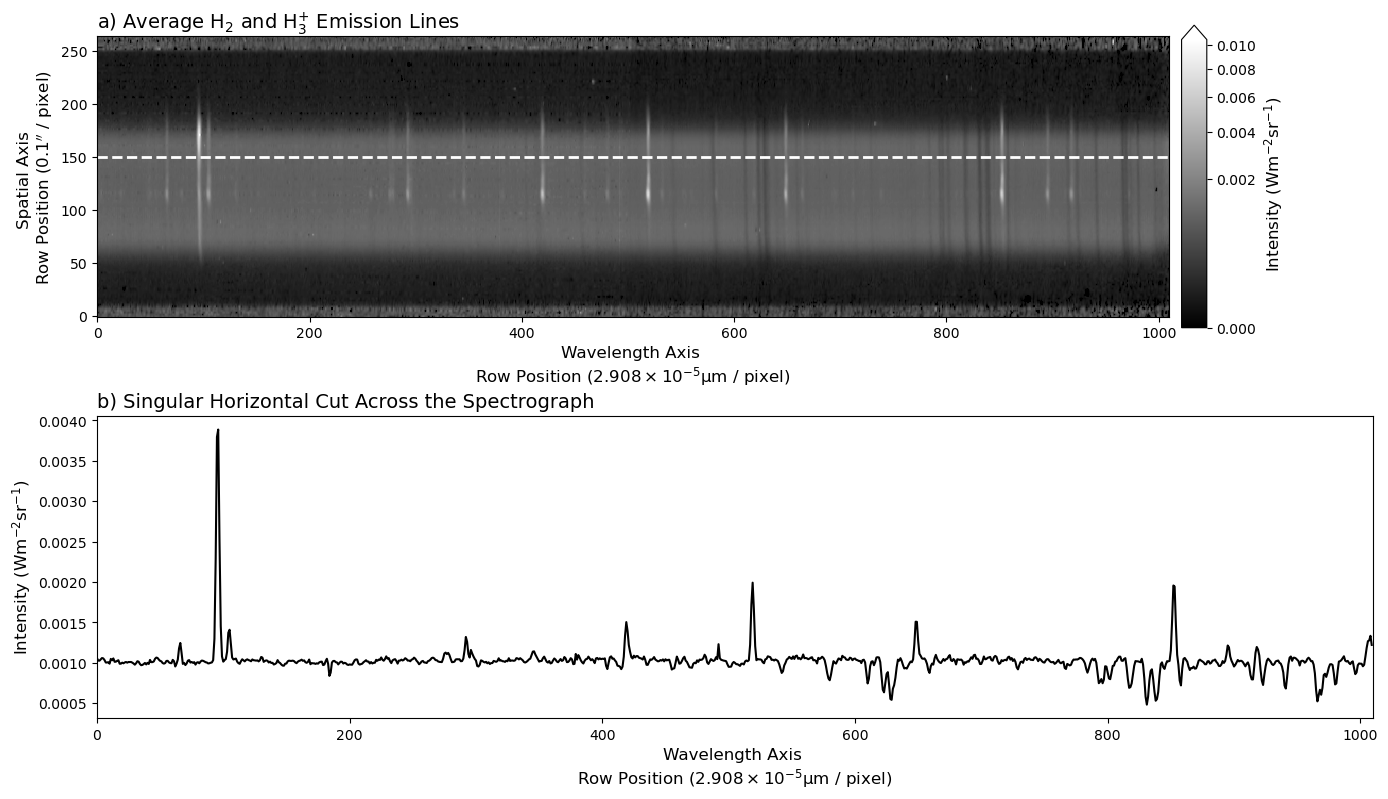

In [4]:
a = np.delete(fjc36[1], np.s_[1010:], 1)

fig = plt.figure(figsize=(14,8), tight_layout=True)

fig.add_subplot(211)
plt.imshow(a, aspect='equal', interpolation='none', cmap='gist_gray', norm=colors.PowerNorm(gamma=0.4))
plt.axhline(y=150, c='white', ls='--', lw=2)
plt.xlabel('Wavelength Axis \nRow Position '+r'($2.908 \times 10^{-5} \mathrm{\mu}$m / pixel)', fontsize=12)
plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=12)
plt.title('a) Average H$_2$ and H$_3^{+}$ Emission Lines', loc='left', fontsize=14)
plt.gca().invert_yaxis()
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)', size=12)
# plt.savefig('obs1', dpi=400, bbox_inches='tight', facecolor='white')

# fig = plt.figure(figsize=(10,9), tight_layout=True)

fig.add_subplot(212)
plt.plot(a[150][:1010], 'k-')
plt.xlabel('Wavelength Axis \nRow Position '+r'($2.908 \times 10^{-5} \mathrm{\mu}$m / pixel)', fontsize=12)
plt.ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=12)
plt.title('b) Singular Horizontal Cut Across the Spectrograph', loc='left', fontsize=14)
plt.xlim(0,1010)
# plt.savefig('obs2', dpi=400, bbox_inches='tight', facecolor='white')

In [ ]:
ss1 = np.delete(a, np.s_[540:], 1)
ss2 = np.delete(ss1, np.s_[:495], 1)

plt.figure()
plt.imshow(ss2, aspect='equal', cmap='gist_gray', norm=colors.PowerNorm(gamma=0.4))

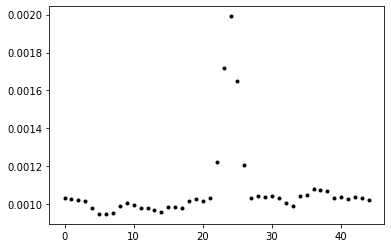

In [28]:
plt.plot(ss2[150], 'k.')

In [26]:
len(ss2[150])

45

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 66
    # data points      = 45
    # variables        = 6
    chi-square         = 2.4915e-08
    reduced chi-square = 6.3885e-10
    Akaike info crit   = -947.150586
    Bayesian info crit = -936.310612
[[Variables]]
    a0:  9.9030e-04 +/- 2.2360e-05 (2.26%) (init = 0.002)
    a1:  23.9391097 +/- 0.02887504 (0.12%) (init = 22)
    a2:  1.36882989 +/- 0.02473495 (1.81%) (init = 2)
    a3:  9.9285e-04 +/- 1.1095e-05 (1.12%) (init = 0)
    a4: -2.8831e-07 +/- 1.2556e-06 (435.51%) (init = 0)
    a5:  4.0029e-08 +/- 2.7583e-08 (68.91%) (init = 0)
[[Correlations]] (unreported correlations are < 0.250)
    C(a4, a5) = -0.973
    C(a3, a4) = -0.849
    C(a3, a5) =  0.737
    C(a0, a2) = -0.456
    C(a2, a4) = -0.268
    C(a2, a5) =  0.267


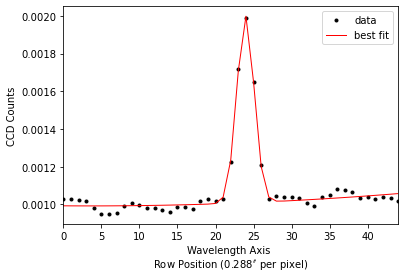

In [32]:
xx = np.linspace(0, 44, 45)

gmodel = Model(gaussian_fit)

gparams = gmodel.make_params()
gparams.add('a0', value=0.002)
gparams.add('a1', value=22)
gparams.add('a2', value=2)
gparams.add('a3', value=0)
gparams.add('a4', value=0)
gparams.add('a5', value=0)

gresult = gmodel.fit(ss2[150], gparams, x=xx)

print(fit_report(gresult, min_correl=0.25))

plt.figure()
plt.plot(xx, ss2[150], 'k.', label='data')
plt.plot(xx, gresult.best_fit, 'r-', lw=1, label='best fit')
plt.xlim(0,44)
plt.xlabel('Wavelength Axis \nRow Position (0.288$^{\prime\prime}$ per pixel)')
plt.ylabel('CCD Counts')
plt.legend()

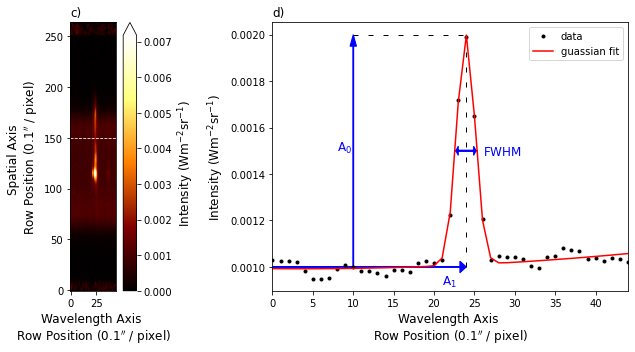

In [122]:
fig = plt.figure(figsize=(12,5), tight_layout=True)

fig.add_subplot(121)
plt.imshow(ss2, aspect='equal', interpolation='none', cmap='afmhot')
plt.axhline(y=150, c='white', ls='--', lw=0.8)
plt.xlabel('Wavelength Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=12)
plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=12)
plt.title('c)', loc='left')
plt.gca().invert_yaxis()
# plt.colorbar(extend='max', label='Intensity (Wm$^{-2}$sr$^{-1}$)')
plt.colorbar(extend='max', aspect=20, pad=0.02, fraction=0.05).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=12)

fig.add_subplot(122)
plt.plot([23.93, 23.93], [0.001, 0.002], color='k', linestyle='--', dashes=(5,10), lw=1)
plt.plot([10, 24], [0.002, 0.002], color='k', linestyle='--', dashes=(5,10), lw=1)
# plt.plot([20, 20], [0.04, 0.16], color='b', linestyle='-', lw=1)
plt.arrow(10, 0.001, 0, 0.001, head_width=0.8, head_length=0.00005, width=0.1, fc='b', ec='b', length_includes_head=True)
plt.arrow(0, 0.001, 24, 0, head_width=0.00005, head_length=0.8, width=0.000004, fc='b', ec='b', length_includes_head=True)
plt.arrow(22.65, 0.0015, 2.55, 0, head_width=0.00004, head_length=0.3, width=0.000004, fc='b', ec='b', length_includes_head=True)
plt.arrow(25.35, 0.0015, -2.65, 0, head_width=0.00004, head_length=0.3, width=0.000004, fc='b', ec='b', length_includes_head=True)
plt.text(8, 0.0015, '$\mathrm{A_0}$', color='b', fontsize=12)
plt.text(21, 0.00092, '$\mathrm{A_1}$', color='b', fontsize=12)
plt.text(26, 0.00148, '$\mathrm{FWHM}$', color='b', fontsize=12)
plt.plot(xx, ss2[150], 'k.', label='data')
plt.plot(xx, gresult.best_fit, 'r-', lw=1.5, label='guassian fit')
plt.xlim(0,44)
plt.xlabel('Wavelength Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=12)
plt.ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=12)
plt.title('d)', loc='left')
plt.legend()

plt.savefig('gaussian_fit', dpi=400, bbox_inches='tight', facecolor='white')

AttributeError: 'AxesSubplot' object has no attribute 'set_colorbar'

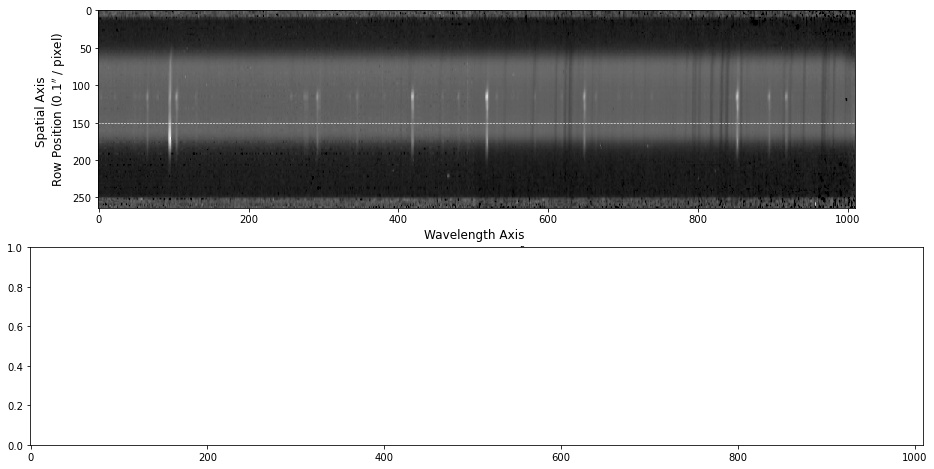

In [57]:
fig, ax = plt.subplots(figsize=(16,8))

ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1)

ax1.imshow(a, aspect='equal', interpolation='none', cmap='gist_gray', norm=colors.PowerNorm(gamma=0.4))
ax1.axhline(y=150, c='white', ls='--', lw=0.6)
ax1.set_xlabel('Wavelength Axis \nRow Position '+r'($2.908 \times 10^{-5} \mathrm{\mu}$m / pixel)', fontsize=12)
ax1.set_ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)', fontsize=12)
# ax1.gca().invert_yaxis()
ax1.set_colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=12)

ax2.plot(a[150])

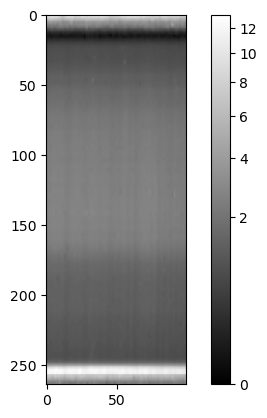

In [5]:
# perform flux calibration - converts the jovian spectra from counts per second to flux
fjc36_list = []
fjc32_list = []
fjc37_list = []
fjc35_list = []
fjc34_list = []

for i in range(np.size(spec36_reduced, axis=0)):
    fjc36_list.append(spec36_reduced[i] / exp_spec * Fc36 * 4.2535e10 / slit_area36)
    fjc32_list.append(spec32_reduced[i] / exp_spec * Fc32 * 4.2535e10 / slit_area32)
    fjc37_list.append(spec37_reduced[i] / exp_spec * Fc37 * 4.2535e10 / slit_area37)
    fjc35_list.append(spec37_reduced[i] / exp_spec * Fc35 * 4.2535e10 / slit_area35)
    fjc34_list.append(spec34_reduced[i] / exp_spec * Fc35 * 4.2535e10 / slit_area34)

fjc36 = np.array(fjc36_list)
fjc32 = np.array(fjc32_list)
fjc37 = np.array(fjc37_list)
fjc35 = np.array(fjc35_list)
fjc34 = np.array(fjc34_list)

# smooth along temporal axis - rolling stack of frame numbers
# stack_list36 = []
# stack_list32 = []
# stack_list37 = []
# stack_list35 = []
# stack_list34 = []

# for i in range(np.size(fjc36, axis=0)-1):
#     if i != 15:
#         stack_list36.append(np.sum((fjc36[i], fjc36[i+1]), axis=0))
#         stack_list32.append(np.sum((fjc32[i], fjc32[i+1]), axis=0))
#         stack_list37.append(np.sum((fjc37[i], fjc37[i+1]), axis=0))
#         stack_list35.append(np.sum((fjc35[i], fjc35[i+1]), axis=0))
#         stack_list34.append(np.sum((fjc34[i], fjc34[i+1]), axis=0))
    
# spec36_coadd = np.array(stack_list36)
# spec32_coadd = np.array(stack_list32)
# spec37_coadd = np.array(stack_list37)
# spec35_coadd = np.array(stack_list35)
# spec34_coadd = np.array(stack_list34)

# smooth along wavelength axis - stacking multiple emission lines to enhance s/n ratio
st_list = []
# smooth = []
for i in range(np.size(fjc36, axis=0)):
    rs1a = np.delete(fjc36[i], np.s_[800:], 1)
    rs1b = np.delete(rs1a, np.s_[:700], 1)

    rs2a = np.delete(fjc32[i], np.s_[700:], 1)
    rs2b = np.delete(rs2a, np.s_[:600], 1)

    rs3a = np.delete(fjc37[i], np.s_[800:], 1)
    rs3b = np.delete(rs3a, np.s_[:700], 1)

    rs4a = np.delete(fjc35[i], np.s_[500:], 1)
    rs4b = np.delete(rs4a, np.s_[:400], 1)

    rs5a = np.delete(fjc34[i], np.s_[200:], 1)
    rs5b = np.delete(rs5a, np.s_[:100], 1)
    
    stt = rs1b+rs2b+rs3b+rs4b+rs5b
    
# smooth along spatial axis - rolling stack of 5 pixels 
#     smoo = []
#     for j in range(2, len(stt)-2):
#         addup = np.mean((stt[j-2],stt[j-1],stt[j],stt[j+1],stt[j+2]), axis=0)
#         smoo.append(addup)
#     smooth = np.array(smoo)
    
    st_list.append(stt)
st = np.array(st_list)

rs1a = np.delete(spec36_stacked, np.s_[800:], 1)
rs1b = np.delete(rs1a, np.s_[:700], 1)

rs2a = np.delete(spec32_stacked, np.s_[700:], 1)
rs2b = np.delete(rs2a, np.s_[:600], 1)

rs3a = np.delete(spec37_stacked, np.s_[800:], 1)
rs3b = np.delete(rs3a, np.s_[:700], 1)

rs4a = np.delete(spec35_stacked, np.s_[500:], 1)
rs4b = np.delete(rs4a, np.s_[:400], 1)

rs5a = np.delete(spec34_stacked, np.s_[200:], 1)
rs5b = np.delete(rs5a, np.s_[:100], 1)

plt.figure()
plt.imshow(rs1b+rs3b+rs4b, cmap='gist_gray', norm=colors.PowerNorm(gamma=0.4))
plt.colorbar()

In [6]:
# create empty list to collect result
background_scan = []

fn0 = 0
fn1 = np.size(st,0)

upper = 245
lower = 10

print('BLANK LOOP START')
for fn in range(fn0, fn1):
    blank = np.zeros(301)
    
    stack = st[fn]
    
    blank = np.zeros(301)      
            
    # fit gaussian to selected range of spatial axis of a frame
    for i in range(lower, upper):               
            blank[i] = np.median(stack[i])
    
    # Collect fitting parameters of each frame number   
    background_scan.append(blank)
    
print('DONE')

BLANK LOOP START
DONE


Text(0.0, 1.0, 'c)')

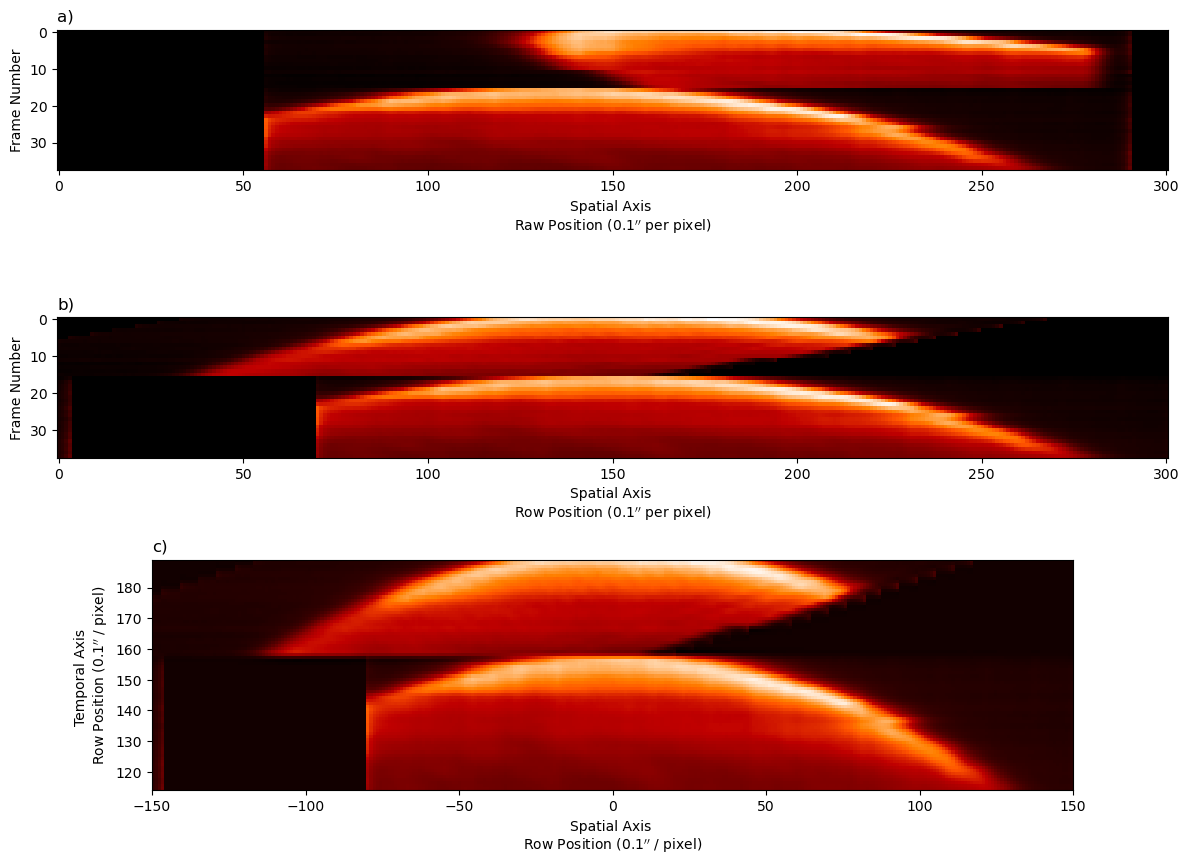

In [30]:
backgr_raw = np.vstack(background_scan)
# backgr = np.delete(backgr, np.s_[132:], 1)
# backgr = np.delete(backgr, np.s_[:7], 1)

# backgr1 = np.roll(backgr_raw[:6], 13, axis=1)
# backgr2 = np.roll(backgr_raw[6:11], 12, axis=1)
# backgr3 = np.roll(backgr_raw[11:16], 20, axis=1)
# backgr4 = np.roll(backgr_raw[16:27], -14, axis=1)
# backgr5 = np.roll(backgr_raw[27:], -14, axis=1)

backgr1 = np.roll(backgr_raw[:6], 23, axis=1)
backgr2 = np.roll(backgr_raw[6:11], 22, axis=1)
backgr3 = np.roll(backgr_raw[11:16], 30, axis=1)
backgr4 = np.roll(backgr_raw[16:27], -14, axis=1)
backgr5 = np.roll(backgr_raw[27:], -14, axis=1)

backgr_shifted = np.vstack((backgr1,backgr2,backgr3,backgr4,backgr5))
# backgr_shifted = backgr_raw + 0

for i in range(16):
    backgr_shifted[i,:] = scipy.ndimage.shift(backgr_shifted[i,:], i*6, order=5)
    
backgr_shifted = np.flip(backgr_shifted, 1)

u=150     #x-position of the center
v=45    #y-position of the center
a=30     #radius on the x-axis
b=30    #radius on the y-axis

u2=150
v2=28
a2=30
b2=30

t = np.linspace(np.pi, 2*np.pi, 100)

backgr_raw = np.flip(backgr_raw, 1)

reback = np.array(Image.fromarray(backgr_shifted).resize(size=(301, 76)))

fig = plt.figure(figsize=(12,9), tight_layout=True)

fig.add_subplot(311)
plt.imshow(backgr_raw, cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)')
plt.ylabel('Frame Number')
plt.title('a)', loc='left')
# plt.colorbar(extend='max', aspect=15, pad=0.02, label='Median of background')

fig.add_subplot(312)
plt.imshow(backgr_shifted, aspect='equal', cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
# plt.imshow(backgr_shifted, aspect='equal', cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
# plt.plot(u+a*np.cos(t) , v+b*np.sin(t), 'cyan', lw=2)
# plt.plot(u2+a2*np.cos(t) , v2+b2*np.sin(t), 'cyan', lw=2)
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)')
plt.ylabel('Frame Number')
plt.title('b)', loc='left')
# plt.colorbar(extend='max', aspect=15, pad=0.02, label='Median of background')

fig.add_subplot(313)
plt.imshow(reback, aspect='equal', cmap='gist_heat', extent=[-150, 150, 114.0669, 189.0669], norm=colors.PowerNorm(gamma=1))
# plt.imshow(backgr_shifted, aspect='equal', cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
# plt.plot(u+a*np.cos(t) , v+b*np.sin(t), 'cyan', lw=2)
# plt.plot(u2+a2*np.cos(t) , v2+b2*np.sin(t), 'cyan', lw=2)
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)')#x coordinate
plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)')#polar pixel radius y coordinate
plt.title('c)', loc='left')

# plt.savefig('ref_sunlight', dpi=400, bbox_inches='tight', facecolor='white')

[117.] [184.]
150.5
[103.] [197.]
150.0
[100.] [202.]
151.0


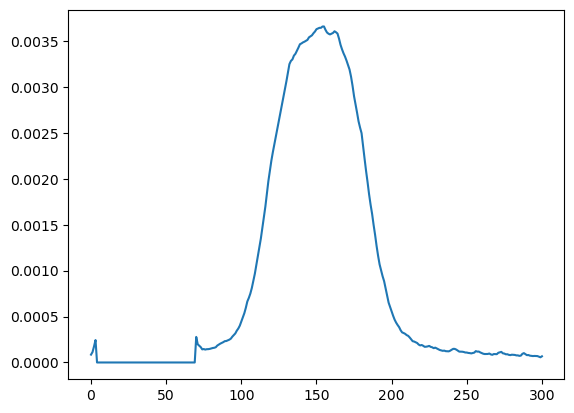

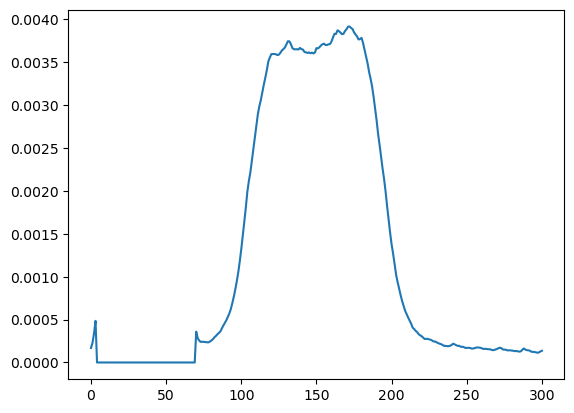

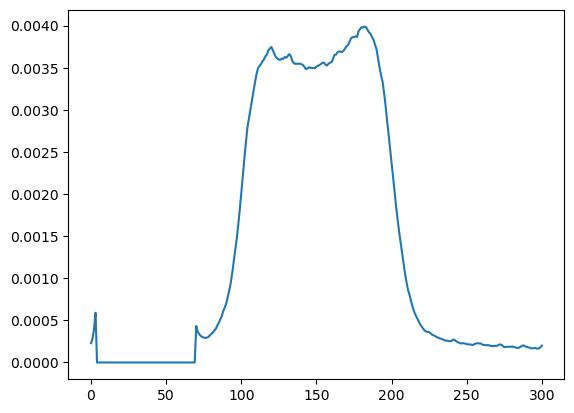

In [27]:
for i in range(16,19):
    limbs = backgr_shifted[i,:]
    plt.figure()
    plt.plot(limbs)

    limbs[limbs<np.amax(limbs)*0.3] = np.amax(limbs)*0.3
    limbs[limbs>np.amax(limbs)*0.6] = np.amax(limbs)*0.6
    
    peak = np.linspace(0, 299, 300)[np.where(np.gradient(limbs)==np.max(np.gradient(limbs)))]
    trough = np.linspace(0, 299, 300)[np.where(np.gradient(limbs)==np.min(np.gradient(limbs)))]

    print(peak, trough)
    print((float(peak) + float(trough))/2)

In [224]:
# backgr_raw = np.vstack(background_scan)

# backgr_shifted = np.vstack((backgr1,backgr2,backgr3,backgr4,backgr5))

# for i in range(16):
#     backgr_shifted[i,:] = scipy.ndimage.shift(backgr_shifted[i,:], i*6, order=3)

backgr_shifted = np.flip(backgr_shifted, axis=1)

for i in range(5):
    limbs = backgr_shifted[i,:]
#     plt.figure()
#     plt.plot(limbs)

    limbs[limbs<np.amax(limbs)*0.2] = np.amax(limbs)*0.2
    limbs[limbs>np.amax(limbs)*0.6] = np.amax(limbs)*0.6
    
    peak = np.linspace(0, 299, 300)[np.where(np.gradient(limbs)==np.max(np.gradient(limbs)))]
    trough = np.linspace(0, 299, 300)[np.where(np.gradient(limbs)==np.min(np.gradient(limbs)))]

    print(peak, trough)
    print((float(peak) + float(trough))/2)
    

#     plt.figure()
#     plt.plot(limbs)
#     plt.figure()
#     plt.plot(np.gradient(limbs))

[100.] [193.]
146.5
[92.] [202.]
147.0
[85.] [210.]
147.5
[78.] [217.]
147.5
[68.] [220.]
144.0


In [6]:
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.degrees(np.arctan2(y, x))
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(np.radians(phi))
    y = rho * np.sin(np.radians(phi))
    return(x, y)


cmlsel = pd.read_csv('cml-sel.txt', sep='\s+', header=None)
jup_cml = cmlsel[3].to_numpy() # needed

ang_diam = 40.58867
jup_pixel_radius = ang_diam/(0.1)/2

jup_seangle=-3.098 # needed
jup_posangle=0
x = 0

flattening = 0.06487
losflattening = flattening * (1 - np.sin(np.radians(jup_seangle)))
eq_po_ratio = 1 - losflattening

y = jup_pixel_radius*eq_po_ratio

def nirspec_calc_lat_long(x,y,jup_pixel_radius,jup_seangle,jup_posangle,jup_cml):
    
    jup_posangle2 = (720-jup_posangle) % 360.
    
    latit = np.zeros(5)
    longit = np.zeros(5)
    
    ccc = np.zeros(5)
    ppp = np.zeros(5)
    xxx = np.zeros(5)
    yyy = np.zeros(5)
    xxx = np.zeros(5)
    
    R = jup_pixel_radius
    
    # do a lat and long for each corner of pixel
    for corner in range(5):
        if corner == 0:
            x2 = x + 0.5
            y2 = y + 0.5
        if corner == 1:
            x2 = x + 0.5
            y2 = y - 0.5
        if corner == 2:
            x2 = x - 0.5
            y2 = y - 0.5
        if corner == 3:
            x2 = x - 0.5
            y2 = y + 0.5
        if corner == 4:
            x2 = x
            y2 = y
            
        # rotate the pixels into jovian rotational coordinates
        polar = cart2pol(x2,y2)
        new_polar = jup_posangle2 + polar[1]
        rect2 = pol2cart(polar[0], new_polar)

        xx = rect2[0]

        # stretch yy to become a sphere
        flattening = 0.06487
        losflattening = flattening * (1 - np.sin(np.radians(jup_seangle)))
        eq_po_ratio = 1 - losflattening

        yy = rect2[1] / eq_po_ratio

        pp = np.sqrt(xx**2 + yy**2) # proper distance from centre

        if pp/R < 0.998 and pp >= 1e-5:
            cc = np.arcsin(pp/R) # angular distance from centre

            ccc[corner] = cc
            ppp[corner] = pp
            xxx[corner] = xx
            yyy[corner] = yy

            latit[corner] = np.arcsin((np.cos(cc) * np.sin(np.radians(jup_seangle))) + ((yy * np.sin(cc) * np.cos(np.radians(jup_seangle))) / pp))
#             longit[corner] = np.radians(jup_cml) - np.arctan((xx * np.sin(cc)) / ((pp * np.arccos(np.radians(jup_seangle)) * np.cos(cc)) - (yy * np.sin(np.radians(jup_seangle)) * np.sin(cc))))
            longit[corner] = ((np.radians(jup_cml) - np.arctan2((xx * np.sin(cc)), ((pp * np.arccos(np.radians(jup_seangle)) * np.cos(cc)) - (yy * np.sin(np.radians(jup_seangle)) * np.sin(cc))))) + (2*np.pi)) % (2*np.pi)
#         elif pp/R < 0.998 and pp < 1e-5:
#             cc = np.arcsin(pp/R) # angular distance from centre

#             ccc[corner] = cc
#             ppp[corner] = pp
#             xxx[corner] = xx
#             yyy[corner] = yy

#             latit[corner] = np.nanmean(np.arcsin((np.cos(cc) * np.sin(np.radians(jup_seangle))) + ((yy * np.sin(cc) * np.cos(np.radians(jup_seangle))) / pp)))
#             longit[corner] = ((np.radians(jup_cml) - np.arctan2((xx * np.sin(cc)), ((pp * np.arccos(np.radians(jup_seangle)) * np.cos(cc)) - (yy * np.sin(np.radians(jup_seangle)) * np.sin(cc))))) * (2*np.pi)) % (2*np.pi)
#         print(latit)
            
    """
    zzz = where(longit ne 0.,zzzcount)
    """
    
    return latit, longit

nirspec_calc_lat_long(0,0,140,0,jup_posangle,0)[0]

array([ 0.00381919, -0.00381919, -0.00381919,  0.00381919,  0.        ])

In [7]:
cml = jup_cml[10]
seangle = -3.098 # needed
r = ang_diam/(0.1)/2
posangle =0
x = 10
y = 10

nirspec_calc_lat_long(x,y,r,seangle,posangle,cml)[0]

array([ 0.00156667, -0.0037299 , -0.00374306,  0.00155351, -0.00108854])

In [8]:
cml2 = np.delete(jup_cml, np.s_[:16], axis=0)
cml2

array([176.352449, 177.561468, 178.165977, 179.374996, 180.584016,
       181.188525, 182.397544, 183.606563, 184.211073, 185.420092,
       186.629111, 188.442639, 189.651658, 190.860677, 191.465186,
       192.674205, 193.883224, 194.487733, 195.696752, 196.905771,
       197.51028 , 198.719299])

In [14]:
seangle = -3.098 # needed
r = ang_diam/(0.1)/2
posangle =0
x = 10
y = 10

flattening = 0.06487
losflattening = flattening * (1 - np.sin(np.radians(jup_seangle)))
eq_po_ratio = 1 - losflattening

eq_po_ratio

new_lat = bgrss2 * 0
new_long = bgrss2 * 0

ypos = np.linspace(186, 186-43, 44)
xpos = np.linspace(-150, 150, 301)


for x in range(len(xpos)):
    for y in range(len(ypos)):
        latit, longit = nirspec_calc_lat_long(xpos[x],ypos[y],r,seangle,posangle,cml2[np.int(y/2)])
        new_lat[y,x] = latit[4]
        new_long[y,x] = longit[4]

In [10]:
203*eq_po_ratio

189.11970620152863

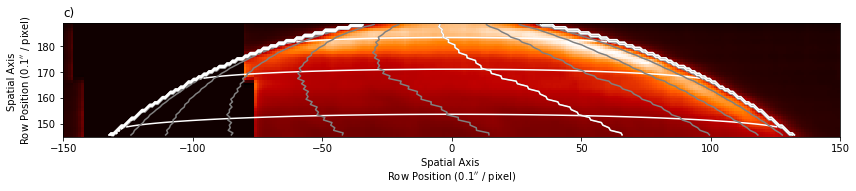

In [24]:
fig = plt.figure(figsize=(12,6), tight_layout=True)

# fig.add_subplot(211)
# plt.imshow(reback, aspect='equal', cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
# # plt.imshow(backgr_shifted, aspect='equal', cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
# # plt.plot(u+a*np.cos(t) , v+b*np.sin(t), 'cyan', lw=2)
# # plt.plot(u2+a2*np.cos(t) , v2+b2*np.sin(t), 'cyan', lw=2)
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)')#x coordinate
# plt.ylabel('Temporal Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)')#polar pixel radius y coordinate
# plt.title('c)', loc='left')

fig.add_subplot(212)
plt.imshow(bgrss2, 
           aspect='equal', 
           cmap='gist_heat', 
           interpolation='none',
           extent=[-150, 150, 145.0669, 189.0669], 
           norm=colors.PowerNorm(gamma=1))
# plt.imshow(backgr_shifted, aspect='equal', cmap='gist_heat', norm=colors.PowerNorm(gamma=1))
# plt.plot(u+a*np.cos(t) , v+b*np.sin(t), 'cyan', lw=2)
# plt.plot(u2+a2*np.cos(t) , v2+b2*np.sin(t), 'cyan', lw=2)
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)')#x coordinate
plt.ylabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ / pixel)')#polar pixel radius y coordinate
plt.title('c)', loc='left')


# plt.imshow(np.degrees(new_lat))
# plt.colorbar()
plt.contour(np.degrees(new_lat), np.linspace(-90, 90, 19), colors='white', origin='upper', extent=[-150, 150, 145.0669, 189.0669])
plt.contour(np.degrees(new_long), np.linspace(0,360,25), colors='gray', origin='upper', extent=[-150, 150, 145.0669, 189.0669])
plt.contour(np.degrees(new_long), np.linspace(0,360,5), colors='white', origin='upper', extent=[-150, 150, 145.0669, 189.0669])

hdu1 = fits.PrimaryHDU(bgrss2)
hdu1.writeto('ref_sun.fits', overwrite=True)

hdu2 = fits.PrimaryHDU(np.degrees(new_lat))
hdu2.writeto('latit.fits', overwrite=True)

hdu3 = fits.PrimaryHDU(np.degrees(new_long))
hdu3.writeto('longit.fits', overwrite=True)

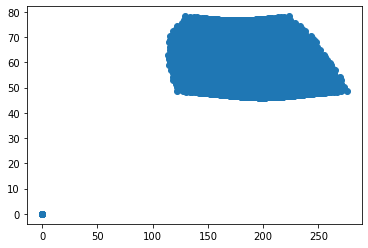

In [30]:
plt.scatter(np.degrees(new_long), np.degrees(new_lat))

[174.06338689  10.88119406 174.6438508  114.68785437]
[ 93.09306833  69.53751684 110.40766938  62.68820488]


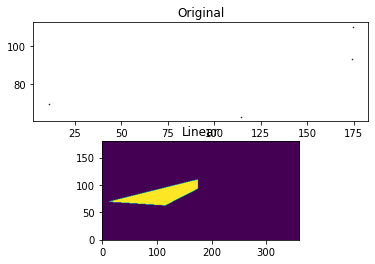

In [9]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt


grid_y, grid_x = np.mgrid[0:180:1801j, 0:360:3601j] #from 0 to 360/180 in 0.1 steps

rng = np.random.default_rng()
points = rng.random((4, 2))*180. # four random latitute and four longitude positions for the four corners


values = points[:,0]*0 +1. # set the brightness to 1 for all four corners


# grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear') # NaNs for where the pixel isn't, and numbers where it is
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear', fill_value=0) # 0s for where the pixel isn't, and numbers where it is

print(points[:,0])
print(points[:,1])

plt.subplot(211)
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')


plt.subplot(212)
plt.imshow(grid_z1, origin='lower')
plt.title('Linear')
plt.show()

In [23]:
grid_y, grid_x = np.mgrid[0:180:1801j, 0:360:3601j] #from 0 to 360/180 in 0.1 steps
grid_yy, grid_xx = np.mgrid[0:180:1801, 0:360:3601]

In [24]:
grid_y.shape

(1801, 3601)

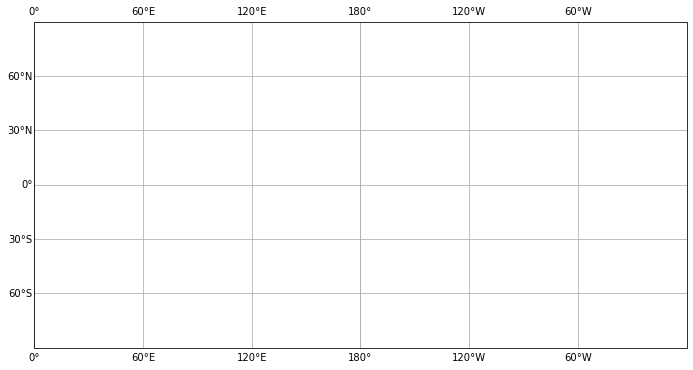

In [28]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

cml = jup_cml[11]
seangle = -3.098

plt.figure(figsize=(14, 6))
# ax2 = plt.axes(projection=ccrs.Orthographic(central_longitude=cml, central_latitude=seangle))
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
# ax2.coastlines(resolution='110m')
gl = ax2.gridlines(draw_labels=True)
gl.top_labels = True
gl.right_labels = True

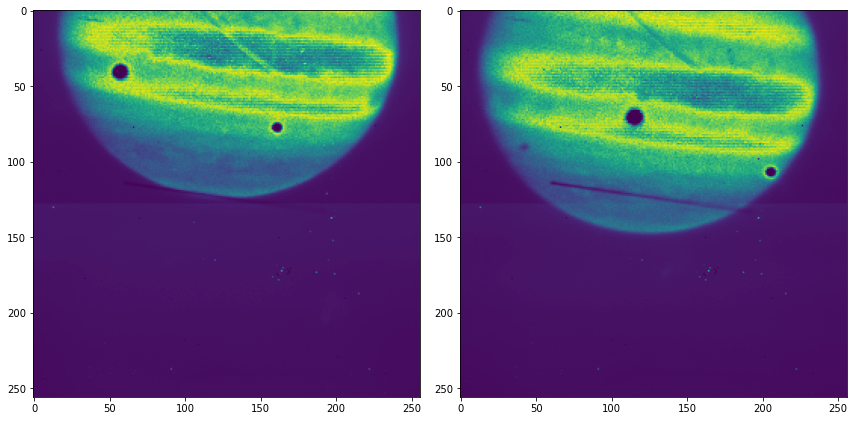

In [23]:
campath = os.path.join(os.path.dirname(notebook_path), 'scam/')

top = fits.open(campath+'/jun02i0394.fits', ignore_missing_end=True)[0].data
bot = fits.open(campath+'/jun02i0768.fits', ignore_missing_end=True)[0].data

fig = plt.figure(figsize=(12,6), tight_layout=True)

fig.add_subplot(121)
plt.imshow(top)

fig.add_subplot(122)
plt.imshow(bot)

In [18]:
np.degrees(new_lat)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
hdu = fits.PrimaryHDU(backgr_shifted)
hdu.writeto('ref_sun.fits', overwrite=True)

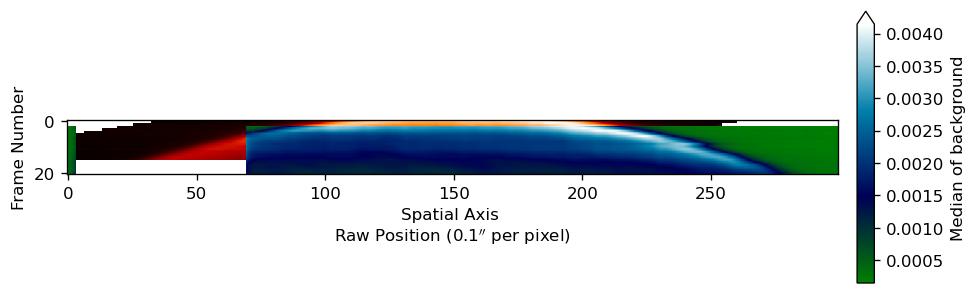

In [219]:
t1 = np.delete(backgr_shifted, np.s_[16:], 0)
t1 = np.vstack((t1, np.zeros((5,300))))
t2 = np.delete(backgr_shifted, np.s_[:19], 0)
t2 = np.vstack((np.zeros((2,300)), t2))

t1[t1 < 1e-5] = np.nan
t2[t2 < 1e-5] = np.nan

plt.figure(figsize=(10,3))
plt.imshow(t1, cmap='gist_heat', norm=colors.PowerNorm(gamma=1), alpha=1)
plt.imshow(t2, cmap='ocean', norm=colors.PowerNorm(gamma=1), alpha=1)
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)')
plt.ylabel('Frame Number')
# plt.title(r'a) H$_2$($\lambda$$\approx$' + str(round(waverange[96], 4)) + '$\mu$m)', loc='left')
plt.colorbar(extend='max', aspect=15, pad=0.02, label='Median of background')

In [208]:
t2.shape, t1.shape

((21, 300), (21, 300))

In [3]:
# extract H3+ properties by fitting gaussian curve to the emission lines
h3p_a0_map = []
h3p_a1_map = []
h3p_fwhm_map = []
h3p_a0_map_error = []
h3p_a1_map_error = []
h3p_fwhm_map_error = []


fn0 = 0
fn1 = np.size(st,0)

upper_h3p = 245
lower_h3p = 10

print('H3p LOOP START')
for fn in range(fn0, fn1):
    print('Frame Number = ' + str(fn))

    h3p_a0 = np.zeros(300)
    h3p_a1 = np.zeros(300)
    h3p_a2 = np.zeros(300)
    h3p_a0_error = np.zeros(300)
    h3p_a1_error = np.zeros(300)
    h3p_a2_error = np.zeros(300)
    
    stack = st[fn]
    
    pixel = np.linspace(0, np.size(stack,1)-1, np.size(stack,1))
    
    for i in range(lower_h3p, upper_h3p):
        # create lmfit model with defined gaussian
        h3p_model = Model(gaussian_fit)

        # create parameters and add initial guess
        h3p_params = h3p_model.make_params()
        h3p_params.add('a0', value=0.03, min=0, max=0.5)
        h3p_params.add('a1', value=20, min=17, max=23)
        h3p_params.add('a2', value=2, min=0, max=6)
        h3p_params.add('a3', value=0)
        h3p_params.add('a4', value=0)
        h3p_params.add('a5', value=0)
        
        # perform gaussian fit and test errors
        try:
            h3p_fit_result = h3p_model.fit(stack[i], h3p_params, x=pixel)
        except ValueError:
            print('ValueError occured at i=' + str(i))
            plt.figure()
            plt.title('i='+str(i))
            plt.plot(pixel, stack[i])
            plt.plot(pixel, h3p_fit_result.best_fit, 'r-', label='best fit')
        
        # collect fitting parameters
        h3p_a0[i] = h3p_fit_result.params['a0'].value
        h3p_a1[i] = h3p_fit_result.params['a1'].value
        h3p_a2[i] = h3p_fit_result.params['a2'].value
        h3p_a0_error[i] = h3p_fit_result.params['a0'].stderr
        h3p_a1_error[i] = h3p_fit_result.params['a1'].stderr
        h3p_a2_error[i] = h3p_fit_result.params['a2'].stderr
        
    # collect fitting parameters of each frame number and calibrate errors
    h3p_a0_map.append(h3p_a0)
    h3p_a1_map.append(h3p_a1)
    h3p_fwhm_map.append(h3p_a2 * (np.sqrt(2*np.log(2))*2))
    
    h3p_a0_error[h3p_a0_error > 10] = 1e10
    h3p_a0_error[np.isnan(h3p_a0_error)] = 1e10
    h3p_a0_map_error.append(h3p_a0_error)
    
    
    h3p_a1_error[h3p_a1_error > 10] = 1e10
    h3p_a1_error[np.isnan(h3p_a1_error)] = 1e10
    h3p_a1_map_error.append(h3p_a1_error)
    
    h3p_a2_error[h3p_a2_error > 10] = 1e10
    h3p_a2_error[np.isnan(h3p_a2_error)] = 1e10  
    h3p_fwhm_map_error.append(h3p_a2_error * (np.sqrt(2*np.log(2))*2))
    
print('DONE')

H3p LOOP START
Frame Number = 0
Frame Number = 1
Frame Number = 2
Frame Number = 3
Frame Number = 4
Frame Number = 5
Frame Number = 6
Frame Number = 7
Frame Number = 8
Frame Number = 9
Frame Number = 10
Frame Number = 11
Frame Number = 12
Frame Number = 13
Frame Number = 14
Frame Number = 15
Frame Number = 16
Frame Number = 17
Frame Number = 18
Frame Number = 19
Frame Number = 20
Frame Number = 21
Frame Number = 22
Frame Number = 23
Frame Number = 24
Frame Number = 25
Frame Number = 26
Frame Number = 27
Frame Number = 28
Frame Number = 29
Frame Number = 30
Frame Number = 31
Frame Number = 32
Frame Number = 33
Frame Number = 34
Frame Number = 35
Frame Number = 36
Frame Number = 37
DONE


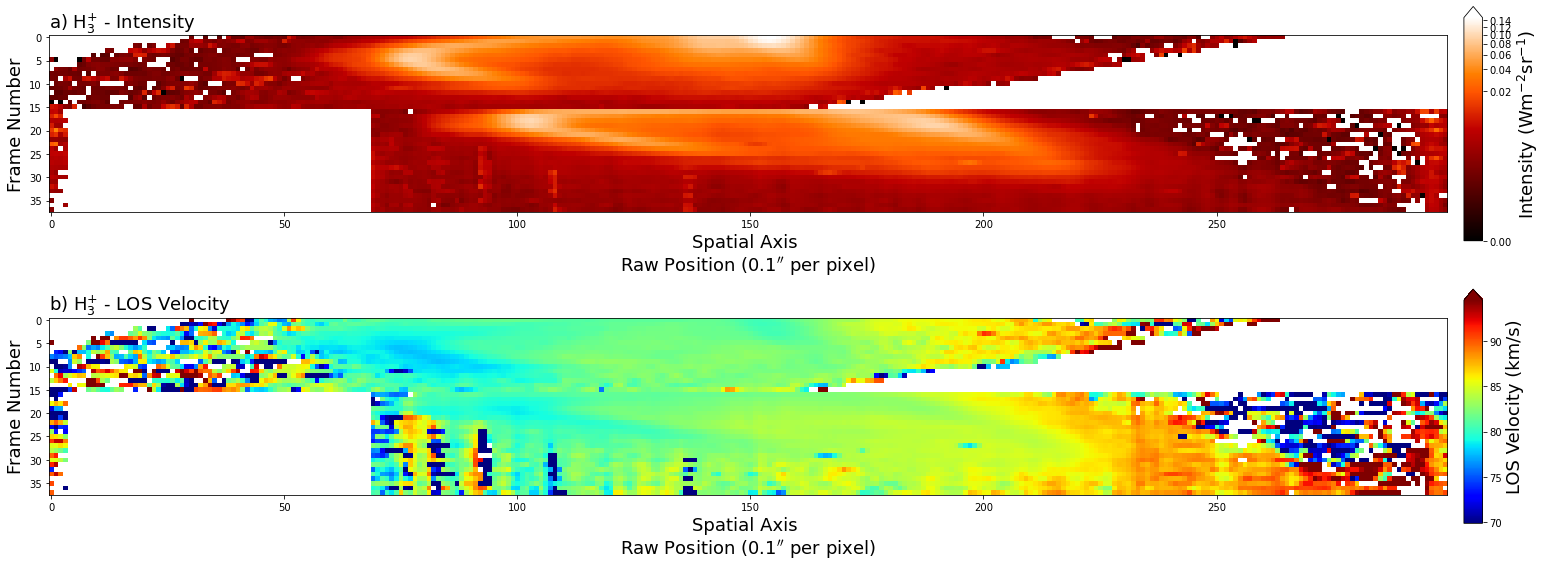

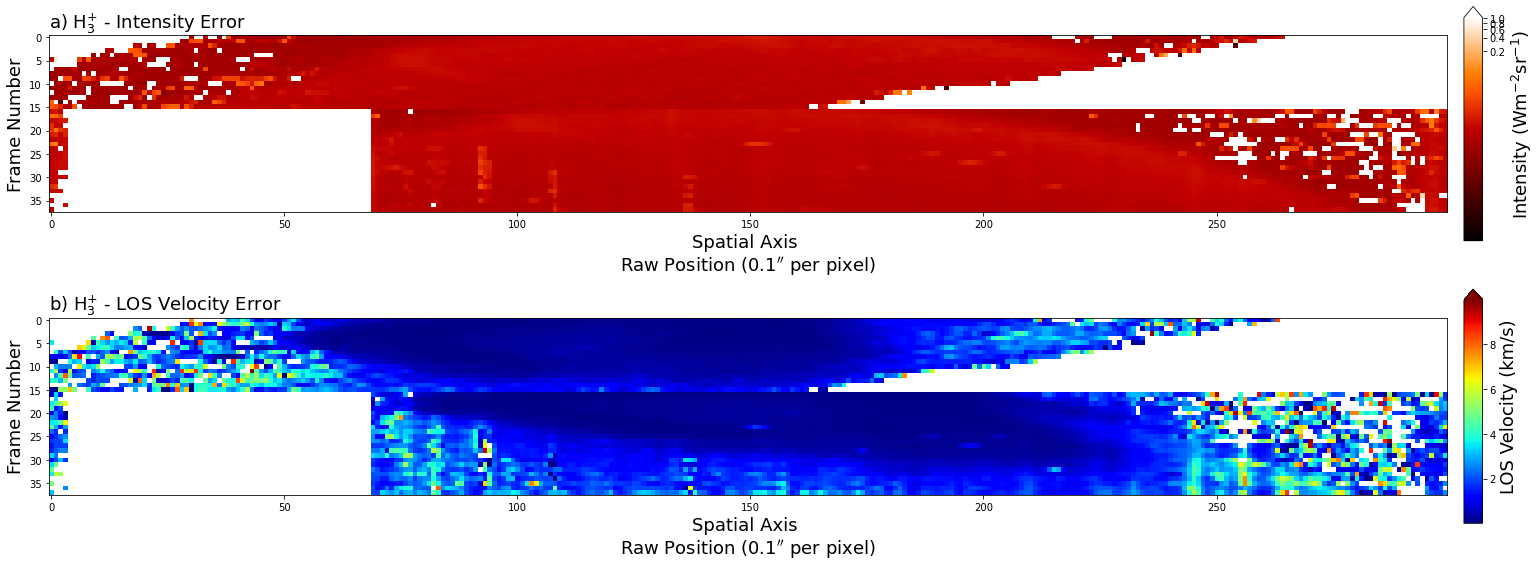

In [24]:
# data
h3p_a0 = np.vstack((h3p_a0_map))
h3p_a1 = np.vstack((h3p_a1_map))
h3p_fwhm = np.vstack((h3p_fwhm_map))

h3p_int = h3p_a0*h3p_fwhm
h3p_los = h3p_a1/R*3e5*np.cos(3.098*np.pi/180)

h3p_int1 = np.roll(h3p_int[:6], 25, axis=1)
h3p_int2 = np.roll(h3p_int[6:11], 24, axis=1)
h3p_int3 = np.roll(h3p_int[11:16], 33, axis=1)
h3p_int4 = np.roll(h3p_int[16:27], -14, axis=1)
h3p_int5 = np.roll(h3p_int[27:], -14, axis=1)
h3p_int_shifted = np.vstack((h3p_int1, h3p_int2, h3p_int3, h3p_int4, h3p_int5))

for i in range(16):
    h3p_int_shifted[i,:] = scipy.ndimage.shift(h3p_int_shifted[i,:], i*6, order=3)

    
h3p_los1 = np.roll(h3p_los[:6], 25, axis=1)
h3p_los2 = np.roll(h3p_los[6:11], 24, axis=1)
h3p_los3 = np.roll(h3p_los[11:16], 33, axis=1)
h3p_los4 = np.roll(h3p_los[16:27], -14, axis=1)
h3p_los5 = np.roll(h3p_los[27:], -14, axis=1)
h3p_los_shifted = np.vstack((h3p_los1, h3p_los2, h3p_los3, h3p_los4, h3p_los5))

for i in range(16):
    h3p_los_shifted[i,:] = scipy.ndimage.shift(h3p_los_shifted[i,:], i*6, order=3)

h3p_int_shifted = np.flip(h3p_int_shifted, 1)
h3p_los_shifted = np.flip(h3p_los_shifted, 1)

# error
h3p_a0_error = np.vstack((h3p_a0_map_error))
h3p_a1_error = np.vstack((h3p_a1_map_error))
h3p_fwhm_error = np.vstack((h3p_fwhm_map_error))

h3p_a0_error[h3p_a0_error==0]=1e10
h3p_a1_error[h3p_a1_error==0]=1e10
h3p_fwhm_error[h3p_fwhm_error==0]=1e10

h3p_a0[h3p_a0==0]=1e10
h3p_a1[h3p_a1==0]=1e10
h3p_fwhm[h3p_fwhm==0]=1e10

h3p_int_error = h3p_int*np.sqrt((h3p_a0_error/h3p_a0)**2+(h3p_fwhm_error/h3p_fwhm)**2)
h3p_los_error = h3p_a1_error/R*3e5*np.cos(3.098*np.pi/180)

h3p_int1_error = np.roll(h3p_int_error[:6], 25, axis=1)
h3p_int2_error = np.roll(h3p_int_error[6:11], 24, axis=1)
h3p_int3_error = np.roll(h3p_int_error[11:16], 33, axis=1)
h3p_int4_error = np.roll(h3p_int_error[16:27], -14, axis=1)
h3p_int5_error = np.roll(h3p_int_error[27:], -14, axis=1)
h3p_int_shifted_error = np.vstack((h3p_int1_error, h3p_int2_error, h3p_int3_error, h3p_int4_error, h3p_int5_error))

for i in range(16):
    h3p_int_shifted_error[i,:] = scipy.ndimage.shift(h3p_int_shifted_error[i,:], i*6, order=3)

h3p_los1_error = np.roll(h3p_los_error[:6], 25, axis=1)
h3p_los2_error = np.roll(h3p_los_error[6:11], 24, axis=1)
h3p_los3_error = np.roll(h3p_los_error[11:16], 33, axis=1)
h3p_los4_error = np.roll(h3p_los_error[16:27], -14, axis=1)
h3p_los5_error = np.roll(h3p_los_error[27:], -14, axis=1)
h3p_los_shifted_error = np.vstack((h3p_los1_error, h3p_los2_error, h3p_los3_error, h3p_los4_error, h3p_los5_error))

for i in range(16):
    h3p_los_shifted_error[i,:] = scipy.ndimage.shift(h3p_los_shifted_error[i,:], i*6, order=3)
    
h3p_int_shifted_error[h3p_int_shifted_error>=10] = np.nan
h3p_int_shifted_error[h3p_int_shifted_error<=1e-6] = np.nan
h3p_los_shifted_error[h3p_los_shifted_error>=10] = np.nan
h3p_los_shifted_error[h3p_los_shifted_error<=1e-6] = np.nan

h3p_int_shifted_error = np.flip(h3p_int_shifted_error, 1)
h3p_los_shifted_error = np.flip(h3p_los_shifted_error, 1)

h3p_int_shifted[np.isnan(h3p_int_shifted_error)] = np.nan
h3p_los_shifted[np.isnan(h3p_los_shifted_error)] = np.nan

# plot
fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(211)
plt.imshow(h3p_int_shifted, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(212)
plt.imshow(h3p_los_shifted, cmap='jet')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_3^{+}$ - LOS Velocity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='LOS Velocity (km/s)',size=18)

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(211)
# colMap = cm.gist_heat
# colMap.set_bad(color='white')
plt.imshow(h3p_int_shifted_error, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.1))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(212)
plt.imshow(h3p_los_shifted_error, cmap='jet')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_3^{+}$ - LOS Velocity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='LOS Velocity (km/s)',size=18)

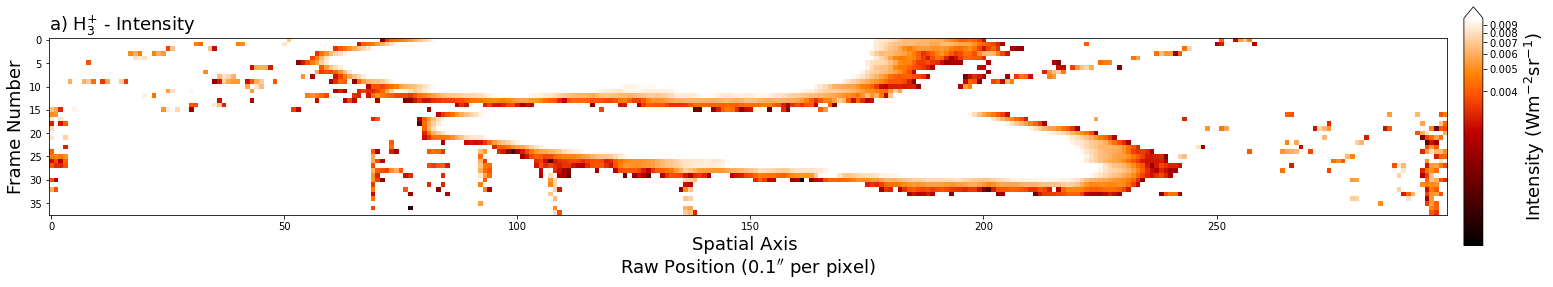

In [51]:
h3p_bright2 = h3p_int_shifted + 0
h3p_bright2[h3p_int_shifted>0.01] = np.nan
h3p_bright2[h3p_int_shifted<0.003] = np.nan

fig = plt.figure(figsize=(24,4), tight_layout=True)

fig.add_subplot(111)
plt.imshow(h3p_bright2, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

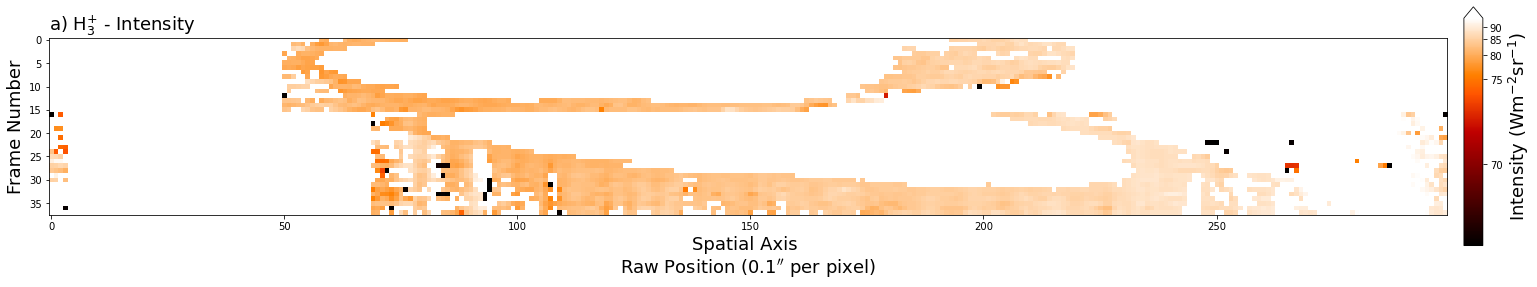

In [123]:
los_vel2 = h3p_los_shifted + 0
los_vel2[h3p_los_shifted_error > 3] = np.nan
los_vel2[h3p_int_shifted<0.001] = np.nan
los_vel2[h3p_int_shifted>0.005] = np.nan

los_vel2[h3p_int_shifted_error>0.0025] = np.nan
# los_vel2[:16,70:185] = np.nan
los_vel2[:16,:50] = np.nan
los_vel2[:16,220:] = np.nan

fig = plt.figure(figsize=(24,4), tight_layout=True)

fig.add_subplot(111)
plt.imshow(los_vel2, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

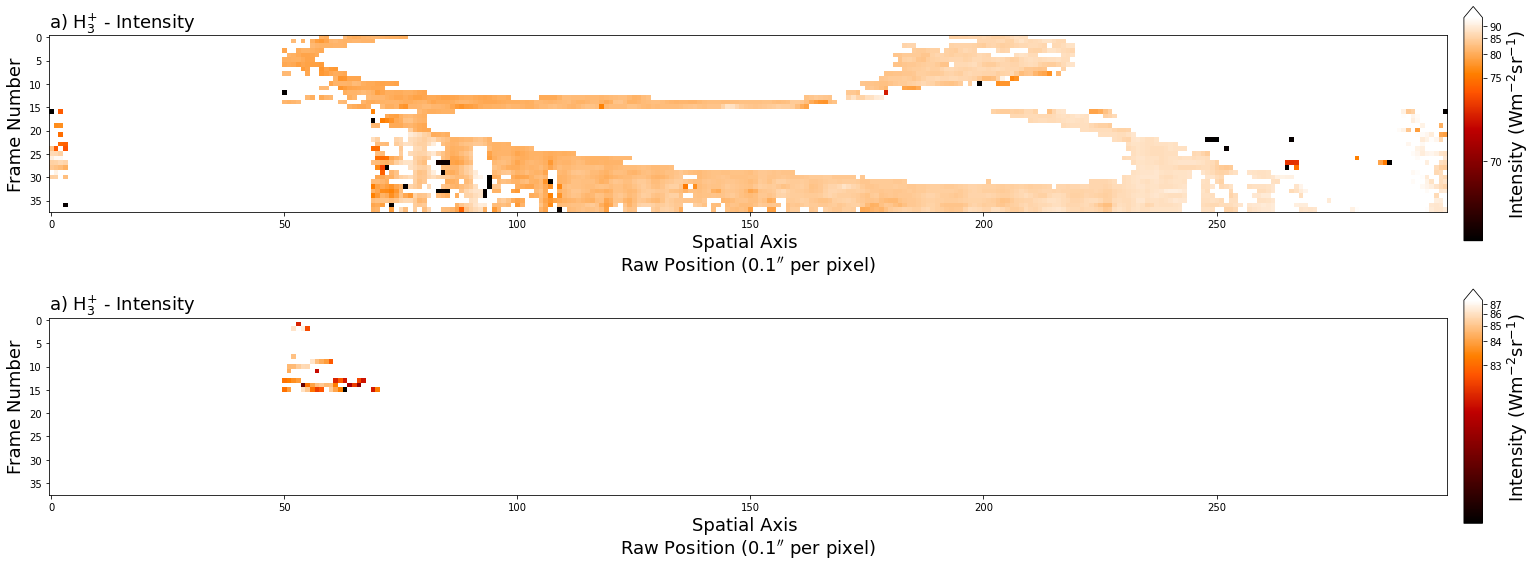

In [132]:
los_vel3 = los_vel2 + 0
los_vel3[los_vel3>90] = np.nan
los_vel3[los_vel3<82] = np.nan

los_vel3[16:] = np.nan
los_vel3[:,100:] = np.nan

los_vel2[np.isfinite(los_vel3)] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(211)
plt.imshow(los_vel2, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(212)
plt.imshow(los_vel3, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

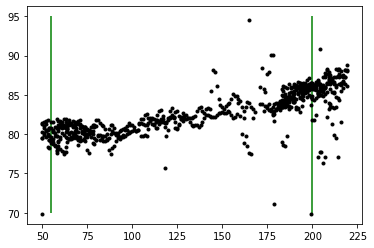

In [133]:
ar = los_vel2 + 0
for i in range(0,300):
    ar[:,i] = i
x2 = ar[:16][np.isfinite(los_vel2[:16])]
ar2 = los_vel2[:16][np.isfinite(los_vel2[:16])]

plt.plot(x2, ar2, 'k.')
plt.vlines(55, ymin=70, ymax=95, color='g')
plt.vlines(200, ymin=70, ymax=95, color='g')

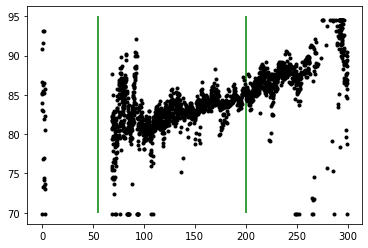

In [135]:
ar = los_vel2 + 0
for i in range(0,300):
    ar[:,i] = i
x2 = ar[16:][np.isfinite(los_vel2[16:])]
ar2 = los_vel2[16:][np.isfinite(los_vel2[16:])]

plt.plot(x2, ar2, 'k.')
plt.vlines(55, ymin=70, ymax=95, color='g')
plt.vlines(200, ymin=70, ymax=95, color='g')

83.16839777332136

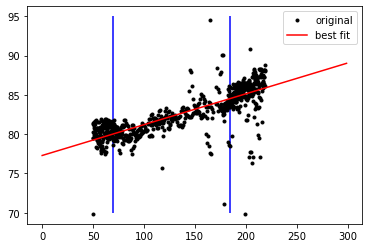

In [134]:
mod = LinearModel()

pars = mod.guess(ar2, x=x2)
out = mod.fit(ar2, pars, x=x2)

m2 = out.params['slope'].value
b2 = out.params['intercept'].value
sig_m2 = out.params['slope'].stderr
sig_b2 = out.params['intercept'].stderr

# x_fit = np.linspace(110,219,110)
x3 = np.linspace(0,299,300)
fit2 = m2 * x3 + b2
error2 = np.sqrt(sig_m2**2 + sig_b2**2)

plt.figure()
plt.plot(x2, ar2,'.k', label = 'original')
plt.plot(x3, fit2, 'r', label = 'best fit')
plt.vlines(70, ymin=70, ymax=95, color='b')
plt.vlines(185, ymin=70, ymax=95, color='b')
plt.legend()

fit2[np.where(x3==150)][0]

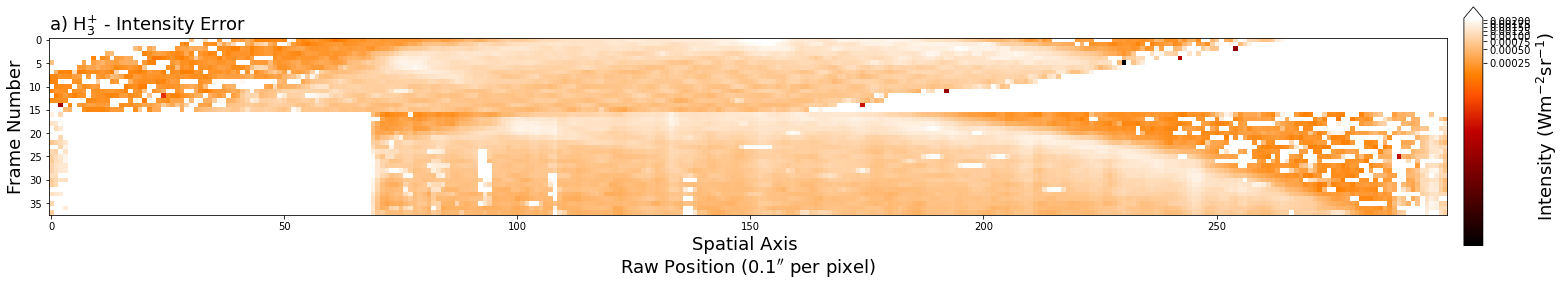

In [65]:
int_err2 = h3p_int_shifted_error + 0
int_err2[h3p_int_shifted_error>0.0022] = np.nan

fig = plt.figure(figsize=(24,4), tight_layout=True)

fig.add_subplot(111)
# colMap = cm.gist_heat
# colMap.set_bad(color='white')
plt.imshow(int_err2, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.1))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

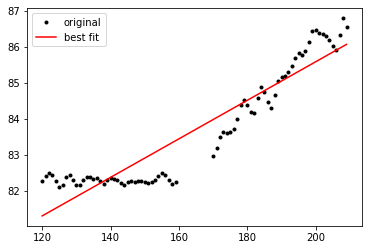

In [45]:
# subtract velocity at center of planet
# top half [:16]
# crop1a = np.delete(h3p_los_shifted[3:6], np.s_[100:], axis=1)
# crop1b = np.delete(crop1a, np.s_[:80], axis=1)
# crop2a = np.delete(h3p_los_shifted[7:10], np.s_[190:], axis=1)
# crop2b = np.delete(crop2a, np.s_[:170], axis=1)
crop1a = np.delete(h3p_los_shifted[1:8], np.s_[210:], axis=1)
crop1b = np.delete(crop1a, np.s_[:170], axis=1)
crop2a = np.delete(h3p_los_shifted[9:14], np.s_[160:], axis=1)
crop2b = np.delete(crop2a, np.s_[:120], axis=1)

# plt.figure(figsize=(10,5))
# plt.imshow(crop1b, cmap='jet', norm=colors.PowerNorm(gamma=0.2))

# plt.figure(figsize=(10,5))
# plt.imshow(crop2b, cmap='jet', norm=colors.PowerNorm(gamma=0.2))

avg_crop1b = np.mean(crop1b, axis=0)
avg_crop2b = np.mean(crop2b, axis=0)
line1 = np.linspace(170,209,40)
line2 = np.linspace(120,159,40)

line_tot = np.concatenate((line1,line2))
avg_crop_tot = np.concatenate((avg_crop1b, avg_crop2b))

# best fit line
mod = LinearModel()

pars_crop = mod.guess(avg_crop_tot, x=line_tot)
out_crop = mod.fit(avg_crop_tot, pars_crop, x=line_tot)

# print(out.fit_report(min_correl=0.25))

m = out_crop.params['slope'].value
y0 = out_crop.params['intercept'].value
sig_m = out_crop.params['slope'].stderr
sig_y0 = out_crop.params['intercept'].stderr

# x_fit = np.linspace(110,219,110)
x_fit = np.linspace(120,209,90)
avg_crop_fit = m * x_fit + y0
avg_crop_error = np.sqrt(sig_m**2 + sig_y0**2)

plt.figure()
plt.plot(line_tot, avg_crop_tot,'.k', label = 'original')
plt.plot(x_fit, avg_crop_fit, 'r', label = 'best fit')
plt.legend()

In [26]:
avg_crop_error

0.23197847506279248

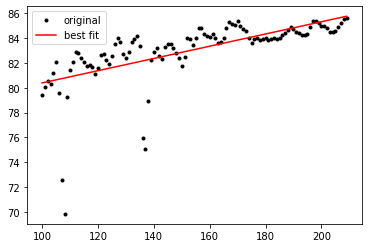

In [27]:
# bottom half [16:]
box1a = np.delete(h3p_los_shifted[30:35], np.s_[210:], axis=1)
box2a = np.delete(box1a, np.s_[:100], axis=1)

# plt.figure(figsize=(10,5))
# plt.imshow(box, cmap='jet', norm=colors.PowerNorm(gamma=0.2))

avg_box = np.mean(box2a, axis=0)

x_axis = np.linspace(100,209,110)

mod = LinearModel()

pars_box = mod.guess(avg_box, x=x_axis)
out_box = mod.fit(avg_box, pars_box, x=x_axis)

# print(out.fit_report(min_correl=0.25))

k = out_box.params['slope'].value
b = out_box.params['intercept'].value
sig_k = out_box.params['slope'].stderr
sig_b = out_box.params['intercept'].stderr

avg_box_fit = k * x_axis + b
avg_box_error = np.sqrt(sig_k**2 + sig_b**2)

plt.figure()
plt.plot(x_axis, avg_box,'.k', label = 'original')
# np.savetxt('h3p_box.txt', avg_box)
plt.plot(x_axis, avg_box_fit, 'r', label = 'best fit')
plt.legend()

In [28]:
avg_box_error

0.8827311053111164

In [30]:
avg_crop_fit[np.where(x_fit==150)][0]

82.43228648729037

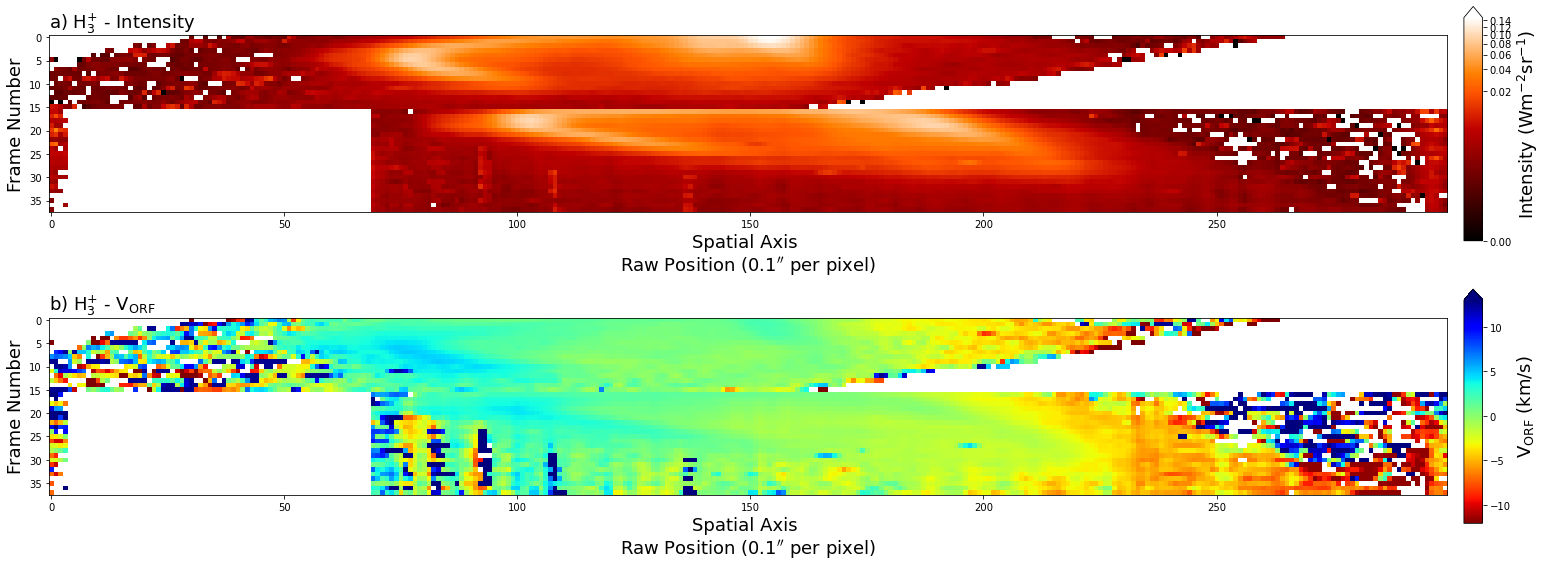

In [29]:
h3p_los_shifted_sec1 = np.delete(h3p_los_shifted, np.s_[16:], axis=0)
h3p_los_shifted_sec2 = np.delete(h3p_los_shifted, np.s_[:16], axis=0)

h3p_los_rel_sec1 = h3p_los_shifted_sec1 - avg_crop_fit[np.where(x_fit==150)][0]
h3p_los_rel_sec2 = h3p_los_shifted_sec2 - avg_box_fit[np.where(x_axis==150)][0]

h3p_los_rel = np.vstack((h3p_los_rel_sec1, h3p_los_rel_sec2))

h3p_int_shifted[np.isnan(h3p_int_shifted_error)] = np.nan
h3p_los_rel[np.isnan(h3p_los_shifted_error)] = np.nan
# h3p_los_rel[h3p_los_rel>=6] = 6
# h3p_los_rel[h3p_los_rel<=-6] = -6


fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(211)
plt.imshow(h3p_int_shifted, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(212)
plt.imshow(h3p_los_rel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_3^{+}$ - V$_{\mathrm{ORF}}$', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{ORF}}$ (km/s)',size=18)

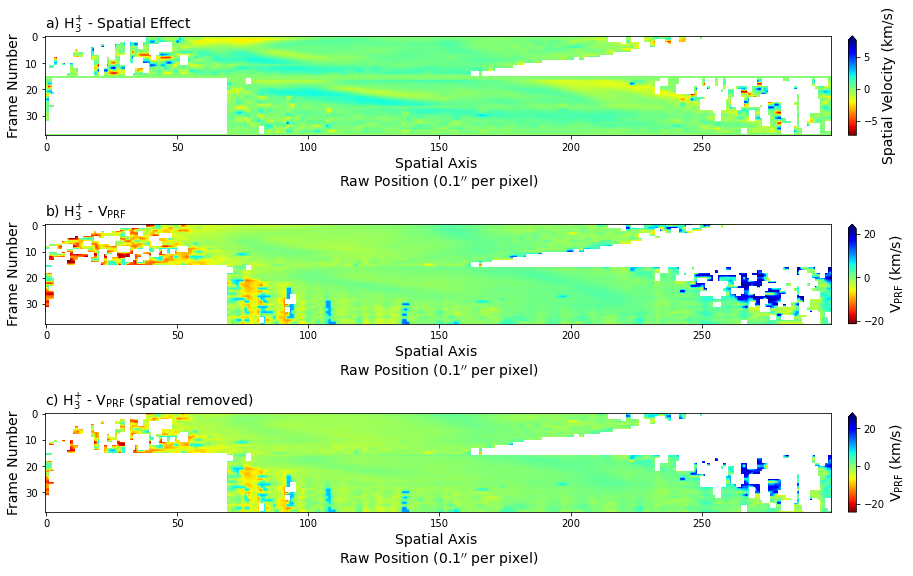

In [37]:
ang_diam = 40.58867
ang_diam/(0.1)
limb_vel = 12.572
vel_slope = limb_vel * 2 / (ang_diam/(0.1))

x = np.linspace(0,299,300)
rot_rate = vel_slope * x
rot_rate = rot_rate - rot_rate[150]

h3p_plan_vel = h3p_los_rel + 0

for i in range(np.size(h3p_los_rel, 0)):
    h3p_plan_vel[i,:] = h3p_los_rel[i,:] - rot_rate


spatial_velocity = h3p_int_shifted + 0
spatial_velocity[::] = 0

for i in range(np.size(spatial_velocity, 1)):
    for j in range(1, np.size(spatial_velocity, 0)-1):
        if j not in (15,16):
            y = np.arange(3)
            p = np.array((h3p_int_shifted[j-1][i], h3p_int_shifted[j][i], h3p_int_shifted[j+1][i]))
#             print(j,i)
    #         plt.figure()
    #         plt.plot(y, p, 'k.', label='original')
            f = scipy.interpolate.interp1d(y,p)
            xnew = np.linspace(0,2,7)
    #         plt.figure()
    #         plt.plot(xnew, f(xnew), 'r.', label='interpolate')
    #         plt.legend()
    #         print(f(xnew[2]), f(xnew[4]))
            p1 = f(xnew[2])
            p3 = f(xnew[4])
            di = (p3 - p1)/(p3 + p1)
            dv = 7.6*di

            if np.isreal(dv):
                spatial_velocity[j,i] = dv

h2_spat_vel2 = fits.open('h2_spatial_vel2.fits', ignore_missing_end=True)[0].data
h2_plan_vel2 = fits.open('h2_plan_vel2.fits', ignore_missing_end=True)[0].data

spatial_velocity2 = spatial_velocity + 0
spatial_velocity2[np.isnan(h2_spat_vel2)] = np.nan
# spatial_velocity2[spatial_velocity <= 1.5] = np.nan

h3p_plan_vel2 = h3p_plan_vel + 0
# h3p_plan_vel2[h3p_plan_vel2 > 5] = np.nan
# h3p_plan_vel2[h3p_plan_vel2 < -1] = np.nan
# h3p_plan_vel2[h3p_los_shifted_error > 1] = np.nan
h3p_plan_vel2[np.isnan(h2_plan_vel2)] = np.nan

# spatial_velocity2[np.isnan(h3p_plan_vel2)] = np.nan

h3p_corrected_vel = h3p_plan_vel-spatial_velocity
# h3p_corrected_vel[h3p_corrected_vel>2] = 2
# h3p_corrected_vel[h3p_corrected_vel<-2] = -2

# h3p_plan_vel[h3p_plan_vel > 3] = 3
# h3p_plan_vel[h3p_plan_vel < -3] = -3


fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(311)
plt.imshow(spatial_velocity*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

fig.add_subplot(312)
plt.imshow(h3p_plan_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('b) H$_3^{+}$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(h3p_corrected_vel*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

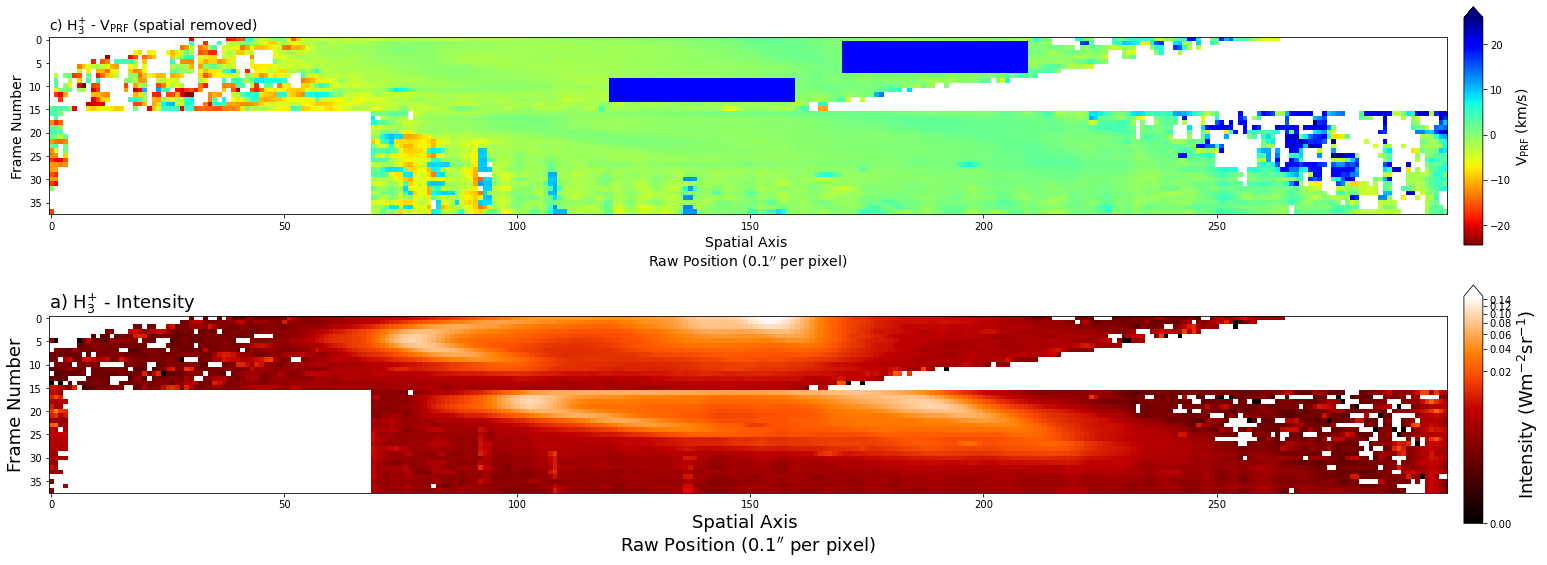

In [44]:
new_array = h3p_corrected_vel + 0
new_array[1:8, 170:210] = -20
new_array[9:14, 120:160] = -20

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(211)
plt.imshow(new_array*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(212)
plt.imshow(h3p_int_shifted, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

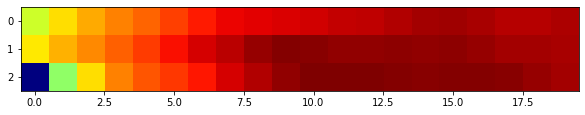

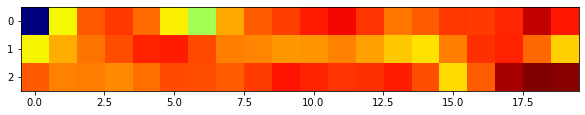

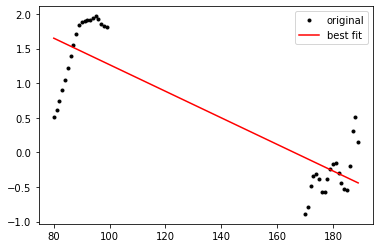

In [33]:
crop3a = np.delete(h3p_corrected_vel[3:6], np.s_[100:], axis=1)
crop3b = np.delete(crop3a, np.s_[:80], axis=1)
crop4a = np.delete(h3p_corrected_vel[7:10], np.s_[190:], axis=1)
crop4b = np.delete(crop4a, np.s_[:170], axis=1)

plt.figure(figsize=(10,5))
plt.imshow(crop3b, cmap='jet', norm=colors.PowerNorm(gamma=0.2))
plt.figure(figsize=(10,5))
plt.imshow(crop4b, cmap='jet', norm=colors.PowerNorm(gamma=0.2))

avg_crop3b = np.mean(crop3b, axis=0)
avg_crop4b = np.mean(crop4b, axis=0)
# line1 = np.linspace(200, 219,20)
# line2 = np.linspace(110,129,20)
line3 = np.arange(80,100)
line4 = np.arange(170,190)

line_tot2 = np.concatenate((line3,line4))
avg_crop_tot2 = np.concatenate((avg_crop3b, avg_crop4b))

# best fit line
mod = LinearModel()

pars_crop2 = mod.guess(avg_crop_tot2, x=line_tot2)
out_crop2 = mod.fit(avg_crop_tot2, pars_crop2, x=line_tot2)

# print(out.fit_report(min_correl=0.25))

m2 = out_crop2.params['slope'].value
y02 = out_crop2.params['intercept'].value
sig_m2 = out_crop2.params['slope'].stderr
sig_y02 = out_crop2.params['intercept'].stderr

# x_fit = np.linspace(110,219,110)
x_fit2 = np.arange(80,190)
avg_crop2_fit = m2 * x_fit2 + y02
avg_crop2_error = np.sqrt(sig_m2**2 + sig_y02**2)

plt.figure()
plt.plot(line_tot2, avg_crop_tot2,'.k', label = 'original')
plt.plot(x_fit2, avg_crop2_fit, 'r', label = 'best fit')
plt.legend()

In [16]:
avg_crop2_error

0.25970503434220554

In [120]:
tres = np.delete(h3p_corrected_vel[30:35], np.s_[230:], axis=1)
cuatro = np.delete(tres, np.s_[:120], axis=1)

avg_cuatro = np.mean(cuatro, axis=0)

x_axis2 = np.linspace(120, 229, 110)

mod = LinearModel()

pars = mod.guess(avg_cuatro, x=x_axis2)
out = mod.fit(avg_cuatro, pars, x=x_axis2)

# print(out.fit_report(min_correl=0.25))

m2 = out.params['slope'].value
y02 = out.params['intercept'].value

h3p_vel_best_fit2 = m2*x_axis2 + y02

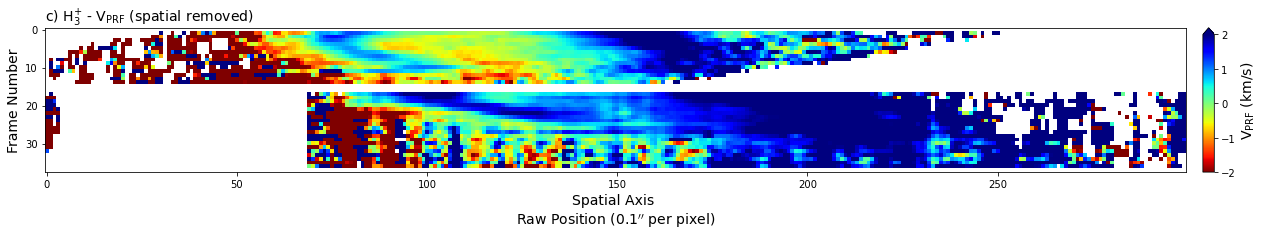

In [22]:
h3p_corrected_vel_sec1 = np.delete(h3p_corrected_vel, np.s_[16:], axis=0)
h3p_corrected_vel_sec2 = np.delete(h3p_corrected_vel, np.s_[:16], axis=0)

h3p_vprf_sec1 = h3p_corrected_vel_sec1 - avg_crop2_fit[np.where(x_fit2==150)][0]
h3p_vprf_sec2 = h3p_corrected_vel_sec2 - avg_crop2_fit[np.where(x_fit2==150)][0] - 0.12351371464356953

h3p_vprf = np.vstack((h3p_vprf_sec1, h3p_vprf_sec2))-1
h3p_vprf[h3p_vprf > 2] = 2
h3p_vprf[h3p_vprf < -2] = -2
h3p_vprf[0] = np.nan
h3p_vprf[15] = np.nan
h3p_vprf[16] = np.nan
h3p_vprf[-1] = np.nan

fig = plt.figure(figsize=(24,8), tight_layout=True)

# fig.add_subplot(311)
# plt.imshow(spatial_velocity2*(-1), cmap='jet_r')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('a) H$_3^{+}$ - Spatial Effect', loc='left', fontsize=14)
# plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Spatial Velocity (km/s)',size=14)

# fig.add_subplot(312)
# plt.imshow(h3p_plan_vel2*(-1), cmap='jet_r')
# plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
# plt.ylabel('Frame Number', fontsize=14)
# plt.title('b) H$_3^{+}$ - V$_{\mathrm{PRF}}$', loc='left', fontsize=14)
# plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

fig.add_subplot(313)
plt.imshow(h3p_vprf*(-1), cmap='jet_r')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('c) H$_3^{+}$ - V$_{\mathrm{PRF}}$ (spatial removed)', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='V$_{\mathrm{PRF}}$ (km/s)',size=14)

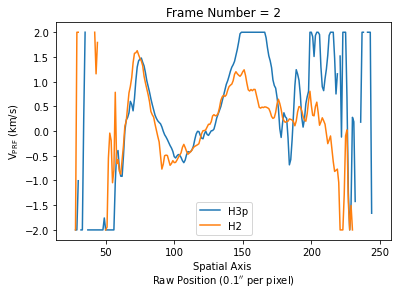

In [23]:
h2_vprf = fits.open('h2_vprf.fits', ignore_missing_end=True)[0].data

a2 = h3p_vprf*(-1)
b2 = h2_vprf*(-1)

num=2

plt.figure()
plt.plot(a2[num], label='H3p')
plt.plot(b2[num], label='H2')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)')
plt.ylabel('V$_{\mathrm{PRF}}$ (km/s)')
plt.title('Frame Number = '+ str(num))
plt.legend()

hdu = fits.PrimaryHDU(h3p_los_rel)
hdu.writeto('h3p_los_rel.fits', overwrite=True)